![](https://imgs.search.brave.com/4u0bxLPquD0Y5VKQ19Ca8-jpEqH_AZc-P_YcCskHPBc/rs:fit:711:225:1/g:ce/aHR0cHM6Ly90c2Ux/Lm1tLmJpbmcubmV0/L3RoP2lkPU9JUC5B/SW8yeU1qazFRbFJj/b3NicG5ZS2hnSGFF/OCZwaWQ9QXBp)

Hello Eveyone, 

Hope you're enjoying life   

In this notebook i will try to Analyize my own Spotify Artist Profile  by comparing it with other artists i'm inspired by  -;
- I will Extract required Data from Spotify API
- After Creating dataset we will move on to EDA,which will examine different audio features of the track 
-Data Preparation- feature selection
- Selecting,Training, Validation of Model
- Deplying the final model on StreamLit Api

I'm hoping to produce
* Artist recommendation API
* Probablity prediction of Track Popularity 
* Useful Insights to apply on my Music Production by Artist Comparison
* Keyword Search



# # Data Extraction

In [12]:
!pip install spotipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install yellowbrick
!pip install pandoc

In [3]:
# Data Collection, Data Cleaning & Data Manipulation 
import numpy as np 
import pandas as pd 
import wordcloud

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats



In [60]:
##Using Client Credentials to get access token for Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

idcl ="8430dac4c0cc41d580798dc2b97b4cd5" 
clsec = "22dd2a849bbc4e40b63c7bf4f7d353f5"

client_credentials_manager = SpotifyClientCredentials(client_id=idcl, client_secret=clsec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### First, I'll Search for my artist profile by artist name 'Yash Vaid' to get my artist ID and then extract track data. I make peaceful Lofi songs though :P 

In [61]:
## First we run a self search
artist_names = ["Yash Vaid"]
artist_ids = []
for artist_name in artist_names:
    results = sp.search(q='artist:' + artist_name,
type='artist')
    
    if len(results['artists']['items']) > 0:
        artist_id = results['artists']['items'][0]['id']
        artist_ids.append(artist_id)
    else:
        print(f"No artist found with name {artist_name}")

print(artist_ids)

['63fx4mjMo5O312sdGzLppD']


Now we search by a track of the artist "Tune Kaha" then retireve top tracks

In [62]:
yashtracks = []
results = sp.search(q='track:Tune kaha (Reprise)', type='track')
if results['tracks']['total'] > 0:
    track = results['tracks']['items'][0]
    track_name = track['name']
    track_uri = track['uri']
    track_id = track['id']
    track_popularity = track['popularity']
    artist_id = track['artists'][0]['id']
    artist_name = track['artists'][0]['name']
    #retrieve all tracks associated with the artist
    artist_tracks = sp.artist_top_tracks(artist_id)
    for track in artist_tracks['tracks']:
        yashtracks.append({'name': track['name'], 'id': track['id'], 'artist_name': artist_name, 'artist_id': artist_id,
                       'track_uri': track_uri, 'track_id': track_id, 'track_popularity': track_popularity})
else:
    print("Track not found.")

print(yashtracks)


[{'name': 'Tune Kaha - Reprise', 'id': '3x2MW5wrCijHoYqhyNmDeX', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16}, {'name': 'Buniyaad - lo-fi reprise', 'id': '5h2PmG02NvtGEyzpBWnv3R', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16}, {'name': 'Rehna Tu - Reprise', 'id': '2kDYr8BF59E1GkFHSs1an2', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16}, {'name': 'Aahatein', 'id': '5ir8MLF6P4h0jZCTe0A1ro', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16}, {'name': 'Khayali 

The using names and ids of tracks we get the features of each track

In [63]:
yash_tracks_with_features = []
for track in yashtracks:
    track_id = track['id']
    audio_features = sp.audio_features(track_id)
    track.update(audio_features[0])
    yash_tracks_with_features.append(track)
print(yash_tracks_with_features)


[{'name': 'Tune Kaha - Reprise', 'id': '3x2MW5wrCijHoYqhyNmDeX', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16, 'danceability': 0.538, 'energy': 0.194, 'key': 3, 'loudness': -17.945, 'mode': 1, 'speechiness': 0.0653, 'acousticness': 0.873, 'instrumentalness': 0.00178, 'liveness': 0.546, 'valence': 0.235, 'tempo': 77.899, 'type': 'audio_features', 'uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_href': 'https://api.spotify.com/v1/tracks/3x2MW5wrCijHoYqhyNmDeX', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3x2MW5wrCijHoYqhyNmDeX', 'duration_ms': 182252, 'time_signature': 4}, {'name': 'Buniyaad - lo-fi reprise', 'id': '5h2PmG02NvtGEyzpBWnv3R', 'artist_name': 'Yash Vaid', 'artist_id': '5f45l2cxXeySZZd8TcaboP', 'track_uri': 'spotify:track:3x2MW5wrCijHoYqhyNmDeX', 'track_id': '3x2MW5wrCijHoYqhyNmDeX', 'track_popularity': 16, 'danceability':

Then we convert it into a dataframe to be converted as a csv file 

In [64]:
yash_tracks_df = pd.DataFrame(yash_tracks_with_features)
yash_tracks_df.to_csv('yashtracks.csv',index=False)

#### Now we add the artists i'm inspired from and want to compare my audio features with

In [65]:
## Full Search
artist_names = ["Sleepy Fish","Jeremy Zucker","Shallou","Chance Pena","Anumita Nadesan","Prateek Kuhad","MITRAZ","Shashwat Sachdev","Hashir","Novo Amor","Montell Fish","Fiji Blue","Mixed Matches","Petit Biscuit","Vierre Cloud","Anuv Jain","Sammie Singh","Frank Ocean","EDEN","Purrple Cat","PinkPantheress","San Holo","Keshi","OneHeart","Honey Ivy","Philantrope","Ben Bohmer","Cristian Jefferies","Shamoon Ismail"]
artist_ids = []
tracks = []

for artist_name in artist_names:
    results = sp.search(q='artist:' + artist_name, type='artist')
    if len(results['artists']['items']) > 0:
        artist_id = results['artists']['items'][0]['id']
        artist_ids.append(artist_id)
        artist_tracks = sp.artist_top_tracks(artist_id)
        for track in artist_tracks['tracks']:
            tracks.append({'name': track['name'], 'id': track['id'], 'artist_name': artist_name, 'artist_id': artist_id,
                           'track_uri': track['uri'], 'track_popularity': track['popularity']})
    else:
        print(f"No artist found with name {artist_name}")

print(artist_ids)
print(tracks)


['1IJe80moz409PtxW4llPFw', '3gIRvgZssIb9aiirIg0nI3', '7C3Cbtr2PkH2l4tOGhtCsk', '4lhUHpVOXmkEBGGHV71QCh', '1nmKYy6efdYl8sIcT0gCLJ', '0tC995Rfn9k2l7nqgCZsV7', '3iGhlvzpXc0UHBQ7klAItX', '465OXuCU8YZNmVG1leLwQ9', '3daREed4KlrtvohgJjSkJr', '0rZp7G3gIH6WkyeXbrZnGi', '5nvWOyAkfNgVLKESq4fOj2', '1e7K8jD3wRuQfnwDAOeGqe', '7A2xUGz3Mbq2tJdMfILN34', '6gK1Uct5FEdaUWRWpU4Cl2', '31ijgiurmIPTNojkYQXdnl', '4gdMJYnopf2nEUcanAwstx', '6jtmYZOc66gj8NNTmAI5ne', '2h93pZq0e7k5yf4dywlkpM', '1gJdf4Yybu4X5A2xYV3NMV', '73aKnLT4O8G2pBEfdlQzrE', '78rUTD7y6Cy67W1RVzYs7t', '0jNDKefhfSbLR9sFvcPLHo', '3pc0bOVB5whxmD50W79wwO', '0dgJbQ0bKPyUXco8hEXN7X', '4cLb6WRMh6RNl8ttNyNbGY', '1fLAC8V0I8XJcqby2swUCh', '5tDjiBYUsTqzd0RkTZxK7u', '6BGqIzx7gcR4j0I7CjQ9Sm', '5bxVbtf4t5k1QPmy0XDvgv']

[{'name': 'i wish it would never stop snowing', 'id': '0jDYc3XRkTaEi5zycl5E1G', 'artist_name': 'Sleepy Fish', 'artist_id': '1IJe80moz409PtxW4llPFw', 'track_uri': 'spotify:track:0jDYc3XRkTaEi5zycl5E1G', 'track_popularity': 48}, {'name': 'Space C

Similarly we get their features by using their track ids in a list format 

In [66]:
tracks_with_features = []
for track in tracks:
    track_id = track['id']
    audio_features = sp.audio_features(track_id)
    track.update(audio_features[0])
    tracks_with_features.append(track)
print(tracks_with_features)

[{'name': 'i wish it would never stop snowing', 'id': '0jDYc3XRkTaEi5zycl5E1G', 'artist_name': 'Sleepy Fish', 'artist_id': '1IJe80moz409PtxW4llPFw', 'track_uri': 'spotify:track:0jDYc3XRkTaEi5zycl5E1G', 'track_popularity': 48, 'danceability': 0.803, 'energy': 0.165, 'key': 4, 'loudness': -14.07, 'mode': 1, 'speechiness': 0.0492, 'acousticness': 0.0372, 'instrumentalness': 0.832, 'liveness': 0.0927, 'valence': 0.419, 'tempo': 126.952, 'type': 'audio_features', 'uri': 'spotify:track:0jDYc3XRkTaEi5zycl5E1G', 'track_href': 'https://api.spotify.com/v1/tracks/0jDYc3XRkTaEi5zycl5E1G', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jDYc3XRkTaEi5zycl5E1G', 'duration_ms': 196500, 'time_signature': 4}, {'name': 'Space Cadet', 'id': '3ftLGQmtMLMRKFZOrAT6tf', 'artist_name': 'Sleepy Fish', 'artist_id': '1IJe80moz409PtxW4llPFw', 'track_uri': 'spotify:track:3ftLGQmtMLMRKFZOrAT6tf', 'track_popularity': 43, 'danceability': 0.698, 'energy': 0.26, 'key': 8, 'loudness': -19.222, 'mode': 1, 'spe

Then we convert it into a dataframe , appen it with my own data, to be converted as a csv file 

In [71]:
import pandas as pd

tracks_df = pd.DataFrame(tracks_with_features)
tracks_df.to_csv('tracks.csv',index=False)

all_tracks = tracks_df.append(yash_tracks_df, ignore_index=True)
Final_data = pd.DataFrame(all_tracks)
Final_data.to_csv('Data_spotify.csv',index=False)
print(Final_data)


                                   name                      id  artist_name  \

0    i wish it would never stop snowing  0jDYc3XRkTaEi5zycl5E1G  Sleepy Fish   

1                           Space Cadet  3ftLGQmtMLMRKFZOrAT6tf  Sleepy Fish   

2                 Away with the Fairies  54ekIgWTXDlmFjlhP8GkqO  Sleepy Fish   

3                            Velocities  3htTVsaQQ78CWAxLVKCHxO  Sleepy Fish   

4                            Watercolor  20oR1iRNt7V3u7N276OVTx  Sleepy Fish   

..                                  ...                     ...          ...   

266            Buniyaad - lo-fi reprise  5h2PmG02NvtGEyzpBWnv3R    Yash Vaid   

267                  Rehna Tu - Reprise  2kDYr8BF59E1GkFHSs1an2    Yash Vaid   

268                            Aahatein  5ir8MLF6P4h0jZCTe0A1ro    Yash Vaid   

269                      Khayali Pulaav  1D19xKW5eESnJN6rTF0AvE    Yash Vaid   

270                             Rukhsat  779LfrTaFer8xMAIhqEQVv    Yash Vaid   



                  artist_i

####This completes our data extraction part 

# DATA EXPLORATION

Now we will have a meet n greet with our data 

In [85]:
data = pd.read_csv(r'C:\Users\yjain\Data_Spotify.csv', header=0)


We can see the names of the Tracks with their respective artist_names retrieved using the artist and tracks

In [86]:
data.head()

name                      id  artist_name  \
0  i wish it would never stop snowing  0jDYc3XRkTaEi5zycl5E1G  Sleepy Fish   
1                         Space Cadet  3ftLGQmtMLMRKFZOrAT6tf  Sleepy Fish   
2               Away with the Fairies  54ekIgWTXDlmFjlhP8GkqO  Sleepy Fish   
3                          Velocities  3htTVsaQQ78CWAxLVKCHxO  Sleepy Fish   
4                          Watercolor  20oR1iRNt7V3u7N276OVTx  Sleepy Fish   

                artist_id                             track_uri  \
0  1IJe80moz409PtxW4llPFw  spotify:track:0jDYc3XRkTaEi5zycl5E1G   
1  1IJe80moz409PtxW4llPFw  spotify:track:3ftLGQmtMLMRKFZOrAT6tf   
2  1IJe80moz409PtxW4llPFw  spotify:track:54ekIgWTXDlmFjlhP8GkqO   
3  1IJe80moz409PtxW4llPFw  spotify:track:3htTVsaQQ78CWAxLVKCHxO   
4  1IJe80moz409PtxW4llPFw  spotify:track:20oR1iRNt7V3u7N276OVTx   

   track_popularity  danceability  energy  key  loudness  ...  liveness  \
0                48         0.803   0.165    4   -14.070  ...    0.0927   
1                43         0.698   0.260    8   -19.222  ...    0.1070   
2                42         0.886   0.232    6    -9.919  ...    0.1140   
3                40         0.623   0.384    3   -16.777  ...    0.1100   
4                38         0.772   0.196    7   -14.088  ...    0.1910   

   valence    tempo            type                                   uri  \
0    0.419  126.952  audio_features  spotify:track:0jDYc3XRkTaEi5zycl5E1G   
1    0.366  127.986  audio_features  spotify:track:3ftLGQmtMLMRKFZOrAT6tf   
2    0.661  130.020  audio_features  spotify:track:54ekIgWTXDlmFjlhP8GkqO   
3    0.098  170.013  audio_features  spotify:track:3htTVsaQQ78CWAxLVKCHxO   
4    0.348   84.031  audio_features  spotify:track:20oR1iRNt7V3u7N276OVTx   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0jDYc3XRkTaE...   
1  https://api.spotify.com/v1/tracks/3ftLGQmtMLMR...   
2  https://api.spotify.com/v1/tracks/54ekIgWTXDlm...   
3  https://api.spotify.com/v1/tracks/3htTVsaQQ78C...   
4  https://api.spotify.com/v1/tracks/20oR1iRNt7V3...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0jDY...      196500   
1  https://api.spotify.com/v1/audio-analysis/3ftL...      142500   
2  https://api.spotify.com/v1/audio-analysis/54ek...      166154   
3  https://api.spotify.com/v1/audio-analysis/3htT...      192000   
4  https://api.spotify.com/v1/audio-analysis/20oR...      171500   

  time_signature track_id  
0              4      NaN  
1              4      NaN  
2              4      NaN  
3              4      NaN  
4              4      NaN  

[5 rows x 24 columns]

Using transpose function, we can see the statistical summary of the variables, we can see the 
-highest track popularity in the dataset is 83 out of 100, 
-danceablity, energy, speechiness, valence, acousticness,instrumentalness and liveness is measured out of 1,
-altough the key is a categorical variable , the track lack loudness as spotify's standard master volume is -14 LUFs,


In [87]:
data.describe().transpose()

count           mean           std          min  \
track_popularity  271.0      50.095941     19.524487      0.00000   
danceability      271.0       0.606668      0.146653      0.17200   
energy            271.0       0.454793      0.210100      0.01730   
key               271.0       5.350554      3.379512      0.00000   
loudness          271.0     -10.986269      4.934289    -33.65500   
mode              271.0       0.730627      0.444455      0.00000   
speechiness       271.0       0.063594      0.053334      0.02530   
acousticness      271.0       0.532251      0.313238      0.00191   
instrumentalness  271.0       0.216784      0.349453      0.00000   
liveness          271.0       0.164111      0.116381      0.04780   
valence           271.0       0.365885      0.230195      0.03500   
tempo             271.0     119.633402     29.138680     59.67700   
duration_ms       271.0  188108.553506  54704.497811  49077.00000   
time_signature    271.0       3.896679      0.426471      1.00000   

                           25%           50%          75%         max  
track_popularity      41.50000      53.00000      64.5000      83.000  
danceability           0.53500       0.60900       0.7085       0.913  
energy                 0.31800       0.46100       0.6015       0.904  
key                    2.00000       6.00000       8.0000      11.000  
loudness             -13.17950     -10.08000      -7.6630       0.829  
mode                   0.00000       1.00000       1.0000       1.000  
speechiness            0.03500       0.04490       0.0677       0.400  
acousticness           0.24950       0.57300       0.8320       0.983  
instrumentalness       0.00001       0.00176       0.3770       0.946  
liveness               0.09660       0.11500       0.1835       0.655  
valence                0.17900       0.33300       0.4925       0.969  
tempo                 95.98100     119.90200     138.9755     213.503  
duration_ms       154578.00000  181613.00000  217102.5000  430968.000  
time_signature         4.00000       4.00000       4.0000       5.000

In [88]:
df = data.copy()


The output below shows that there are no null values in the 265 rows of the data.

In [89]:
df.isnull().sum()

name                  0
id                    0
artist_name           0
artist_id             0
track_uri             0
track_popularity      0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type                  0
uri                   0
track_href            0
analysis_url          0
duration_ms           0
time_signature        0
track_id            265
dtype: int64

The output of the code below shows us there are 15 artists in the dataset

Now we find the most popular artists in the dataset and visualize them

In [90]:
#Find the most popular artists in data set
from wordcloud import WordCloud

plt.figure(figsize = (20, 14))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<Figure size 2000x1400 with 0 Axes>

Next, we will find the most popular artists & songs in the dataset by track popularity ,then visualize them using word cloud, it's sad that i don't see my name here :( , and that's what makes this analysis more crucial for me :)

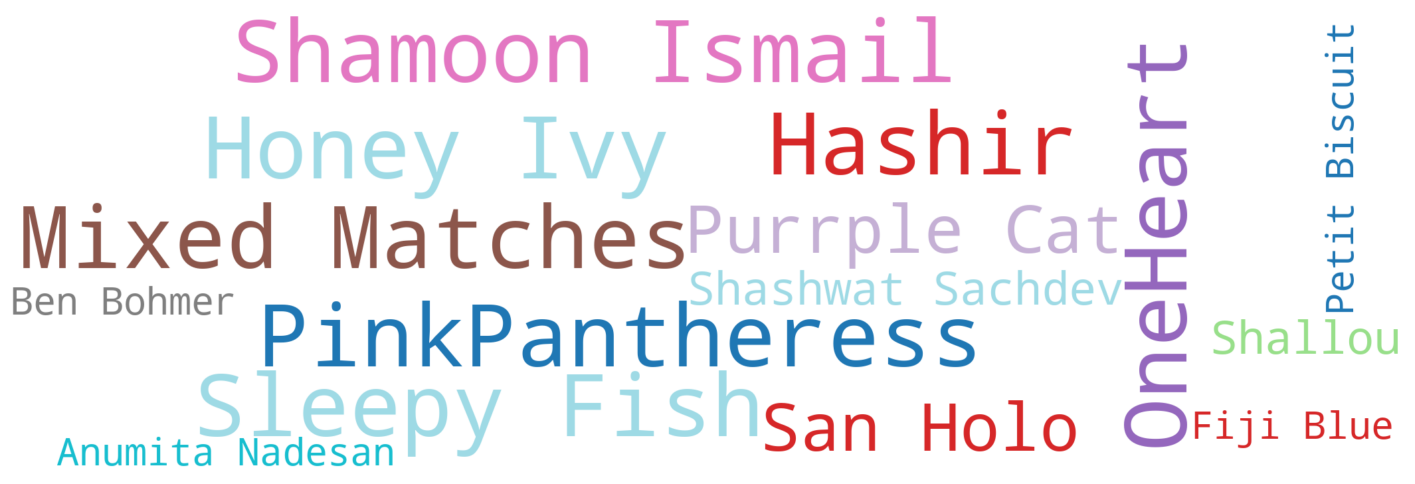

In [91]:
most_popularity = df.query('track_popularity < 86', inplace = False).sort_values('track_popularity', ascending = False)

lead_artists = most_popularity['artist_name'].value_counts().head(15)

visualize_word_counts(lead_artists)

In [92]:
lead_songs = most_popularity[['name', 'track_popularity']].head(12)
lead_songs

name  track_popularity
187            Boy's a liar                83
217                snowfall                83
157            Pink + White                82
188      Boy's a liar Pt. 2                80
158                    Lost                80
167                   Chale                79
168     Como Quieras Quiero                77
159                Novacane                77
160                     Ivy                76
140                  moment                76
189                    Pain                75
100  Fall in Love with You.                75

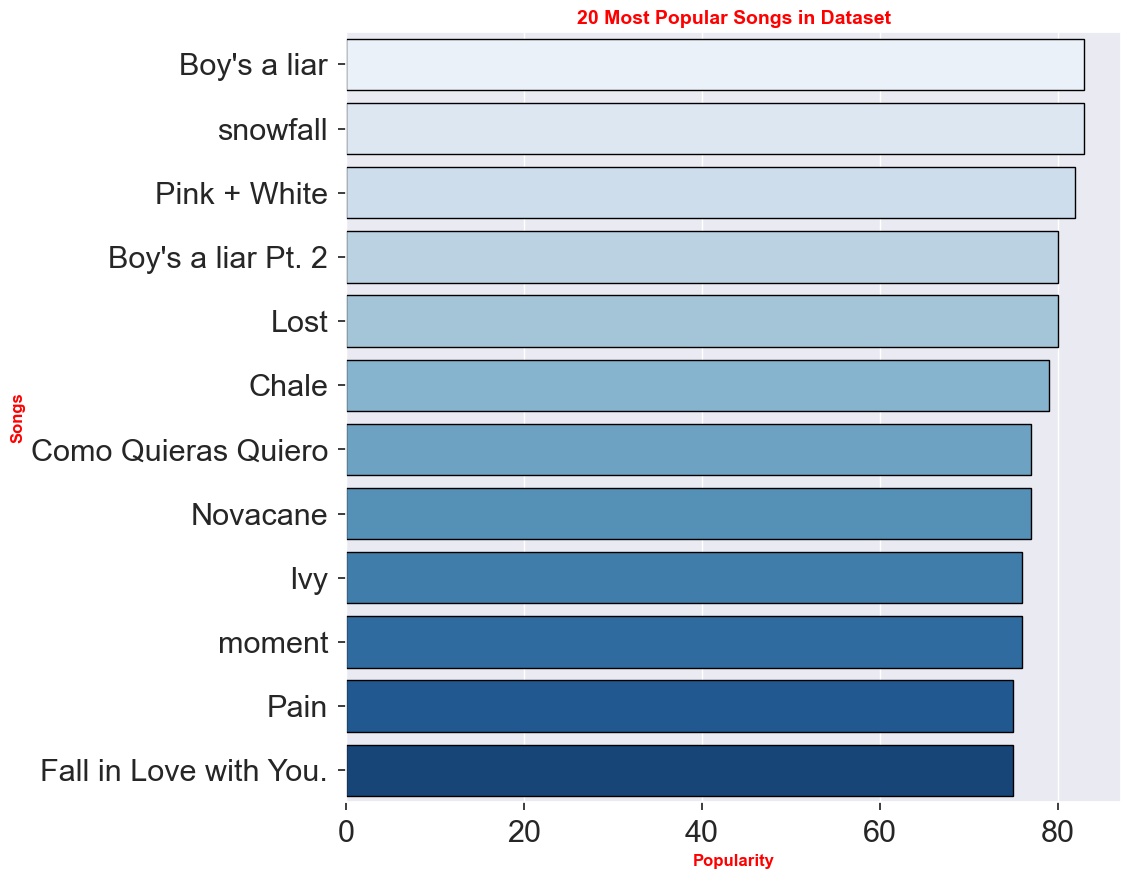

In [93]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = lead_songs.track_popularity, y = lead_songs.name, palette = 'Blues', orient = 'h', edgecolor = 'black', ax = ax)

ax.set_xlabel('Popularity', c ='red', fontsize = 12, weight = 'bold')
ax.set_ylabel('Songs', c = 'red', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Songs in Dataset', c = 'red', fontsize = 14, weight = 'bold')

plt.show()


In [94]:
yash_comparison = df.query('artist_name == "Yash Vaid"', inplace = False).sort_values('track_popularity', ascending = False)
print(yash_comparison)

                         name                      id artist_name  \

265       Tune Kaha - Reprise  3x2MW5wrCijHoYqhyNmDeX   Yash Vaid   

266  Buniyaad - lo-fi reprise  5h2PmG02NvtGEyzpBWnv3R   Yash Vaid   

267        Rehna Tu - Reprise  2kDYr8BF59E1GkFHSs1an2   Yash Vaid   

268                  Aahatein  5ir8MLF6P4h0jZCTe0A1ro   Yash Vaid   

269            Khayali Pulaav  1D19xKW5eESnJN6rTF0AvE   Yash Vaid   

270                   Rukhsat  779LfrTaFer8xMAIhqEQVv   Yash Vaid   



                  artist_id                             track_uri  \

265  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   

266  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   

267  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   

268  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   

269  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   

270  5f45l2cxXeySZZd8TcaboP  spotify:track:3x2MW5wrCijHoYqhyNmDeX   



     track_popul

### Audio Analysis & Comparison of Yash Vaid's track data vs other artists

In [95]:
from sklearn import preprocessing

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(yash_comparison[feat_cols].mean(), ignore_index=True)

print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top Songs'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='Yash Vaid Songs'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \

0      0.606668  0.454793     0.063594      0.532251          0.216784   

1      0.552167  0.340167     0.049233      0.704333          0.118550   



   liveness   valence  

0  0.164111  0.365885  

1  0.272667  0.309833  


The chart above shows that other tracks have less acousticness in comparison, it also suggests why there is slight lack in energy, danceablity and liveliness of yash vaid tracks. There is room for improvement in terms of mastering and mixing the song to match the professional output

Now we analyze different features against others

In [96]:
#Finding songs by one feature
most_acousticness = df.sort_values(by='acousticness',ascending=False).head(10)

most_acousticness

name                      id    artist_name  \
51             Kho Gaye Hum Kahan  6nZiYSBwPQ7fYnVWkkkj4g  Prateek Kuhad   
93             Repeat Until Death  5PzWVmfzu7rePAuFkxPQf0      Novo Amor   
226              Dreams Come True  26s2v0HMr4MTCtMb5Jfov6       OneHeart   
9    The Field from Spirited Away  04K7QBqlTAMDHQV7j88IPV    Sleepy Fish   
104         love you more than me  3jc0jdopFsv3dYz5uo8OCr   Montell Fish   
97                         Euphor  4CiqKccFFYGmFPz7HVTjfW      Novo Amor   
155                         Ocean  4BL4aEbddW0OGv6fFYYFUt      Anuv Jain   
91                    State Lines  7CoMBpPTwQi2wPT0U0Nr9b      Novo Amor   
106                Enough For You  37G1Mx1vZHxKia3aDPMQxd   Montell Fish   
132                 Night Trouble  5LLtNp8qc3NaCIieZ2W4Dk  Petit Biscuit   

                  artist_id                             track_uri  \
51   0tC995Rfn9k2l7nqgCZsV7  spotify:track:6nZiYSBwPQ7fYnVWkkkj4g   
93   0rZp7G3gIH6WkyeXbrZnGi  spotify:track:5PzWVmfzu7rePAuFkxPQf0   
226  0dgJbQ0bKPyUXco8hEXN7X  spotify:track:26s2v0HMr4MTCtMb5Jfov6   
9    1IJe80moz409PtxW4llPFw  spotify:track:04K7QBqlTAMDHQV7j88IPV   
104  5nvWOyAkfNgVLKESq4fOj2  spotify:track:3jc0jdopFsv3dYz5uo8OCr   
97   0rZp7G3gIH6WkyeXbrZnGi  spotify:track:4CiqKccFFYGmFPz7HVTjfW   
155  4gdMJYnopf2nEUcanAwstx  spotify:track:4BL4aEbddW0OGv6fFYYFUt   
91   0rZp7G3gIH6WkyeXbrZnGi  spotify:track:7CoMBpPTwQi2wPT0U0Nr9b   
106  5nvWOyAkfNgVLKESq4fOj2  spotify:track:37G1Mx1vZHxKia3aDPMQxd   
132  6gK1Uct5FEdaUWRWpU4Cl2  spotify:track:5LLtNp8qc3NaCIieZ2W4Dk   

     track_popularity  danceability  energy  key  loudness  ...  liveness  \
51                 65         0.778  0.2270    1   -16.191  ...    0.1130   
93                 66         0.233  0.1500    1   -11.736  ...    0.1540   
226                59         0.303  0.2040    7   -25.035  ...    0.1050   
9                  26         0.751  0.0715    5   -17.832  ...    0.1320   
104                67         0.482  0.0191    4   -28.939  ...    0.1140   
97                 63         0.296  0.2840   10   -14.010  ...    0.0961   
155                50         0.720  0.2370    3   -11.665  ...    0.0952   
91                 70         0.509  0.3100    9   -10.623  ...    0.0963   
106                63         0.362  0.2010    4   -16.437  ...    0.1410   
132                57         0.411  0.3640    1   -15.335  ...    0.1260   

     valence    tempo            type                                   uri  \
51    0.3800  116.033  audio_features  spotify:track:6nZiYSBwPQ7fYnVWkkkj4g   
93    0.0875  143.887  audio_features  spotify:track:5PzWVmfzu7rePAuFkxPQf0   
226   0.0988   70.119  audio_features  spotify:track:26s2v0HMr4MTCtMb5Jfov6   
9     0.6560   81.977  audio_features  spotify:track:04K7QBqlTAMDHQV7j88IPV   
104   0.3330   99.151  audio_features  spotify:track:3jc0jdopFsv3dYz5uo8OCr   
97    0.0917  114.786  audio_features  spotify:track:4CiqKccFFYGmFPz7HVTjfW   
155   0.6060  125.335  audio_features  spotify:track:4BL4aEbddW0OGv6fFYYFUt   
91    0.1510  137.474  audio_features  spotify:track:7CoMBpPTwQi2wPT0U0Nr9b   
106   0.1480  122.538  audio_features  spotify:track:37G1Mx1vZHxKia3aDPMQxd   
132   0.0685   95.967  audio_features  spotify:track:5LLtNp8qc3NaCIieZ2W4Dk   

                                            track_href  \
51   https://api.spotify.com/v1/tracks/6nZiYSBwPQ7f...   
93   https://api.spotify.com/v1/tracks/5PzWVmfzu7re...   
226  https://api.spotify.com/v1/tracks/26s2v0HMr4MT...   
9    https://api.spotify.com/v1/tracks/04K7QBqlTAMD...   
104  https://api.spotify.com/v1/tracks/3jc0jdopFsv3...   
97   https://api.spotify.com/v1/tracks/4CiqKccFFYGm...   
155  https://api.spotify.com/v1/tracks/4BL4aEbddW0O...   
91   https://api.spotify.com/v1/tracks/7CoMBpPTwQi2...   
106  https://api.spotify.com/v1/tracks/37G1Mx1vZHxK...   
132  https://api.spotify.com/v1/tracks/5LLtNp8qc3Na...   

                                          analysis_url duration_ms  \
51   

In [97]:
num_df = df.select_dtypes(include = 'number')

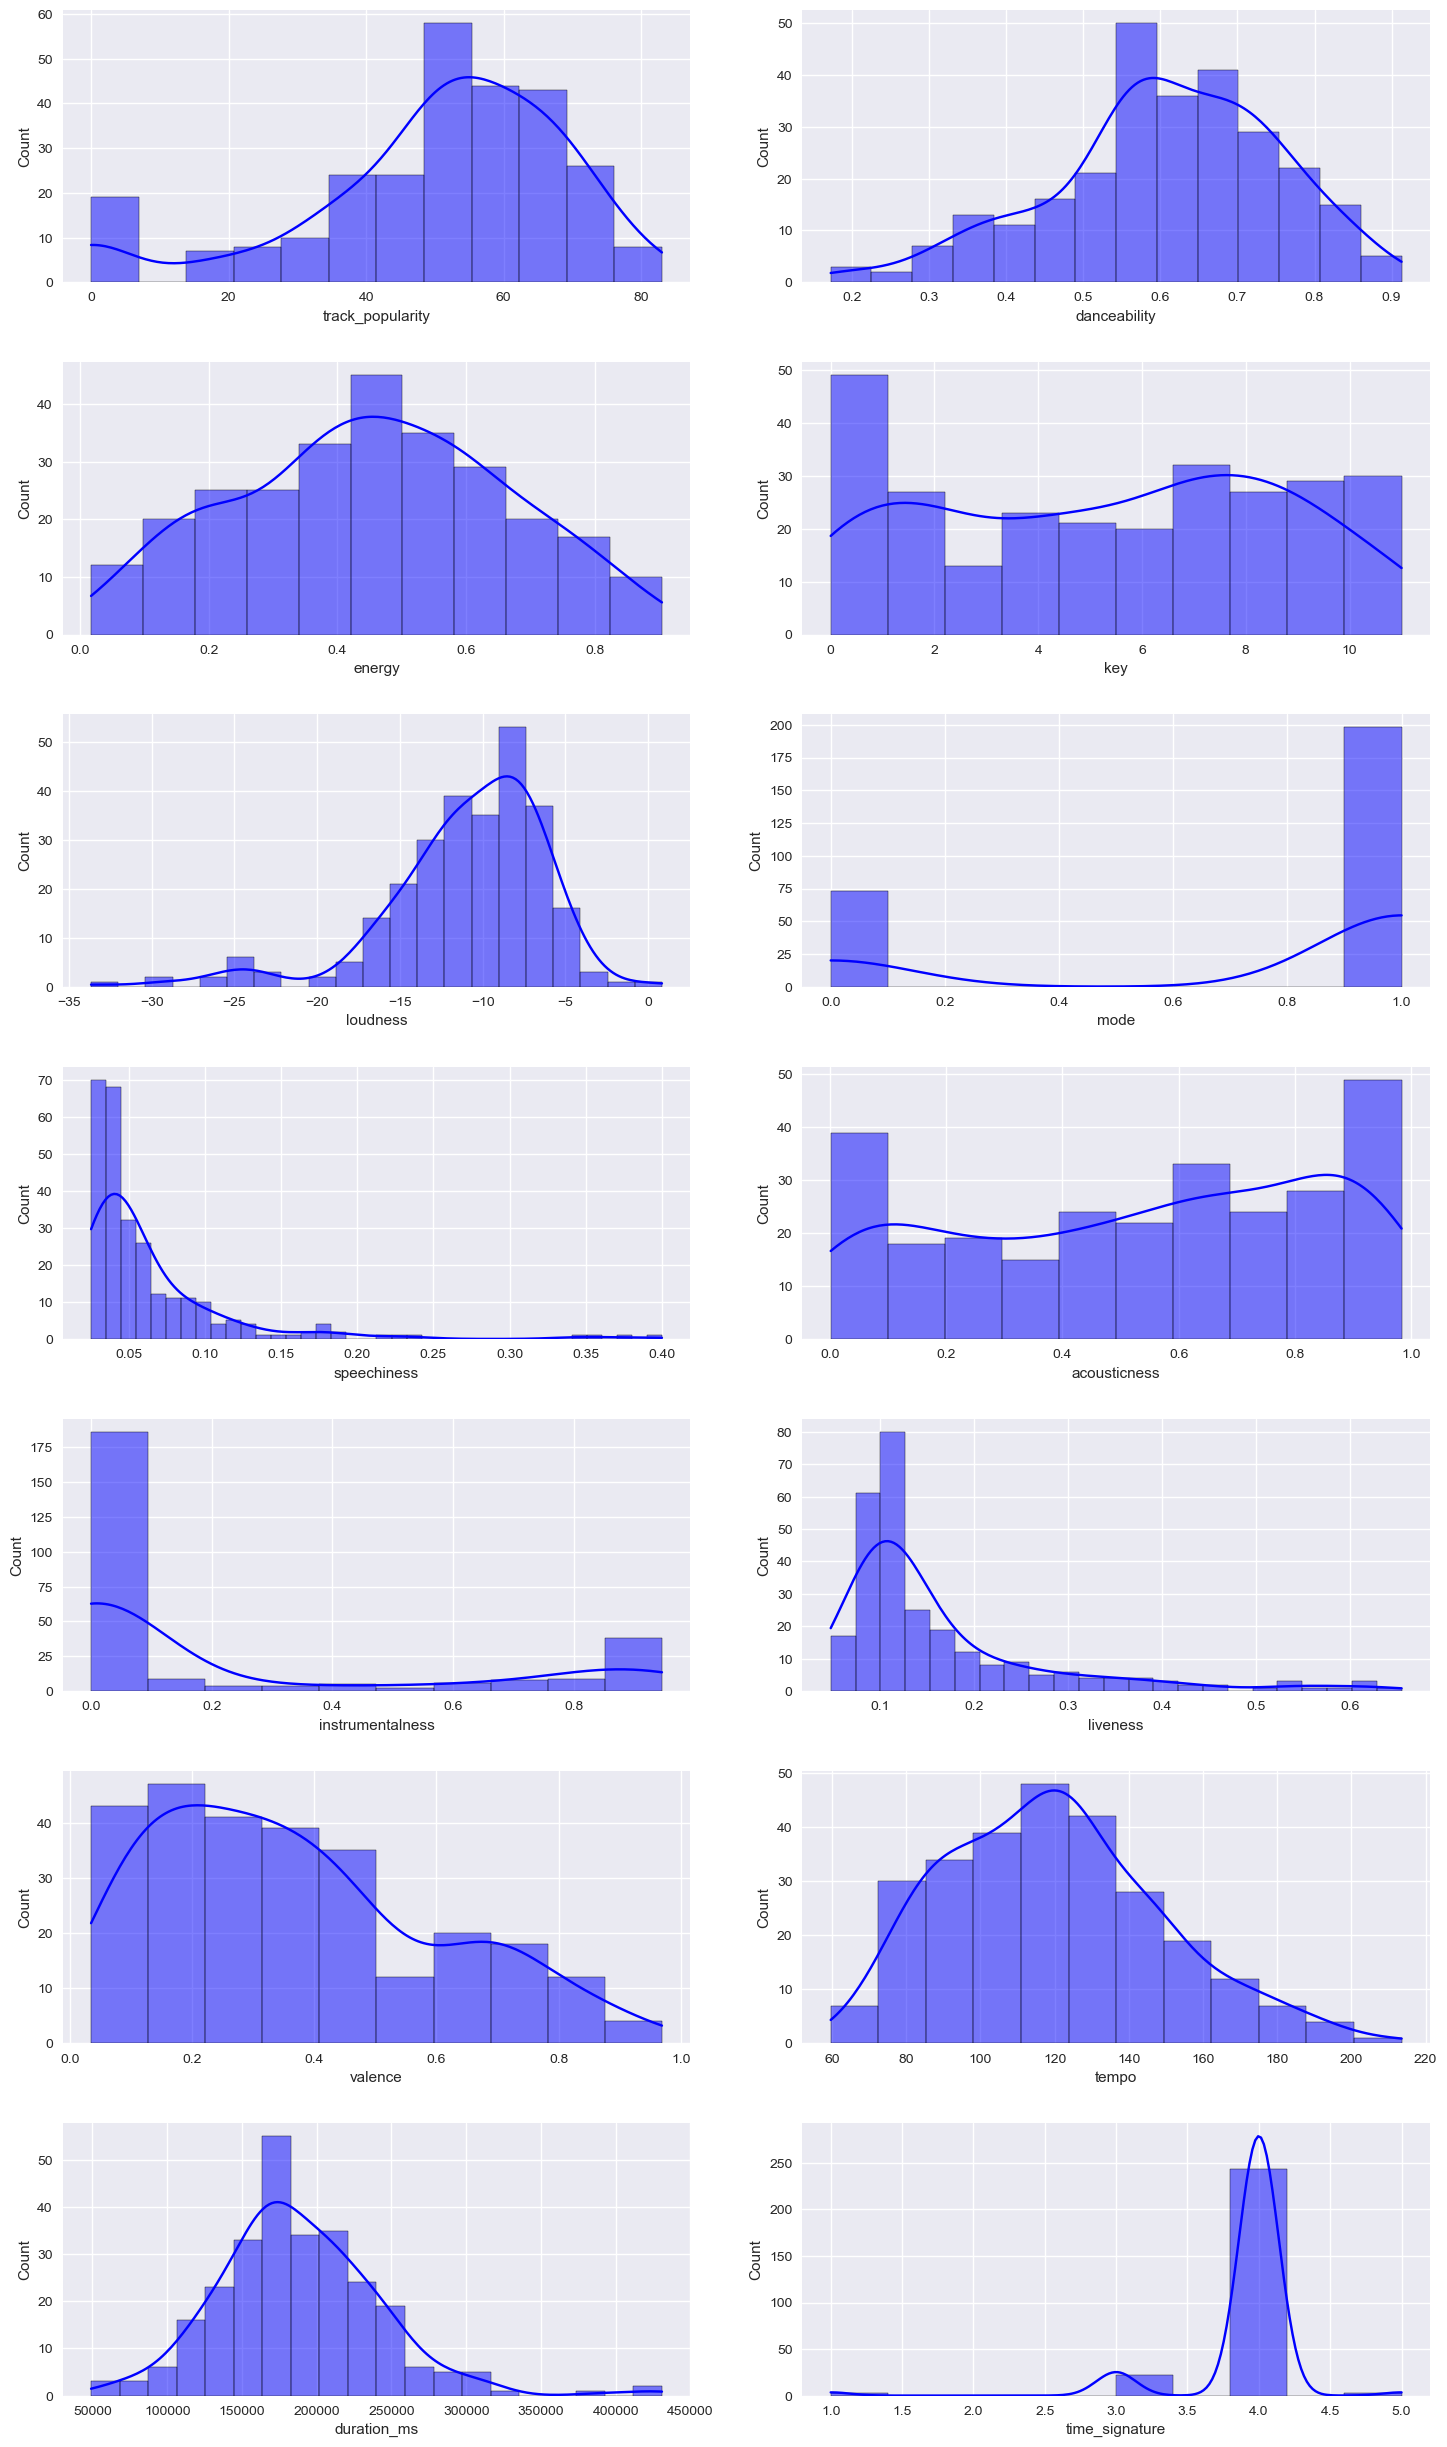

In [98]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(x=df[name], kde = True, ax=axes[i, j], color = 'blue')
    y = y + 1

plt.tight_layout()
plt.show()


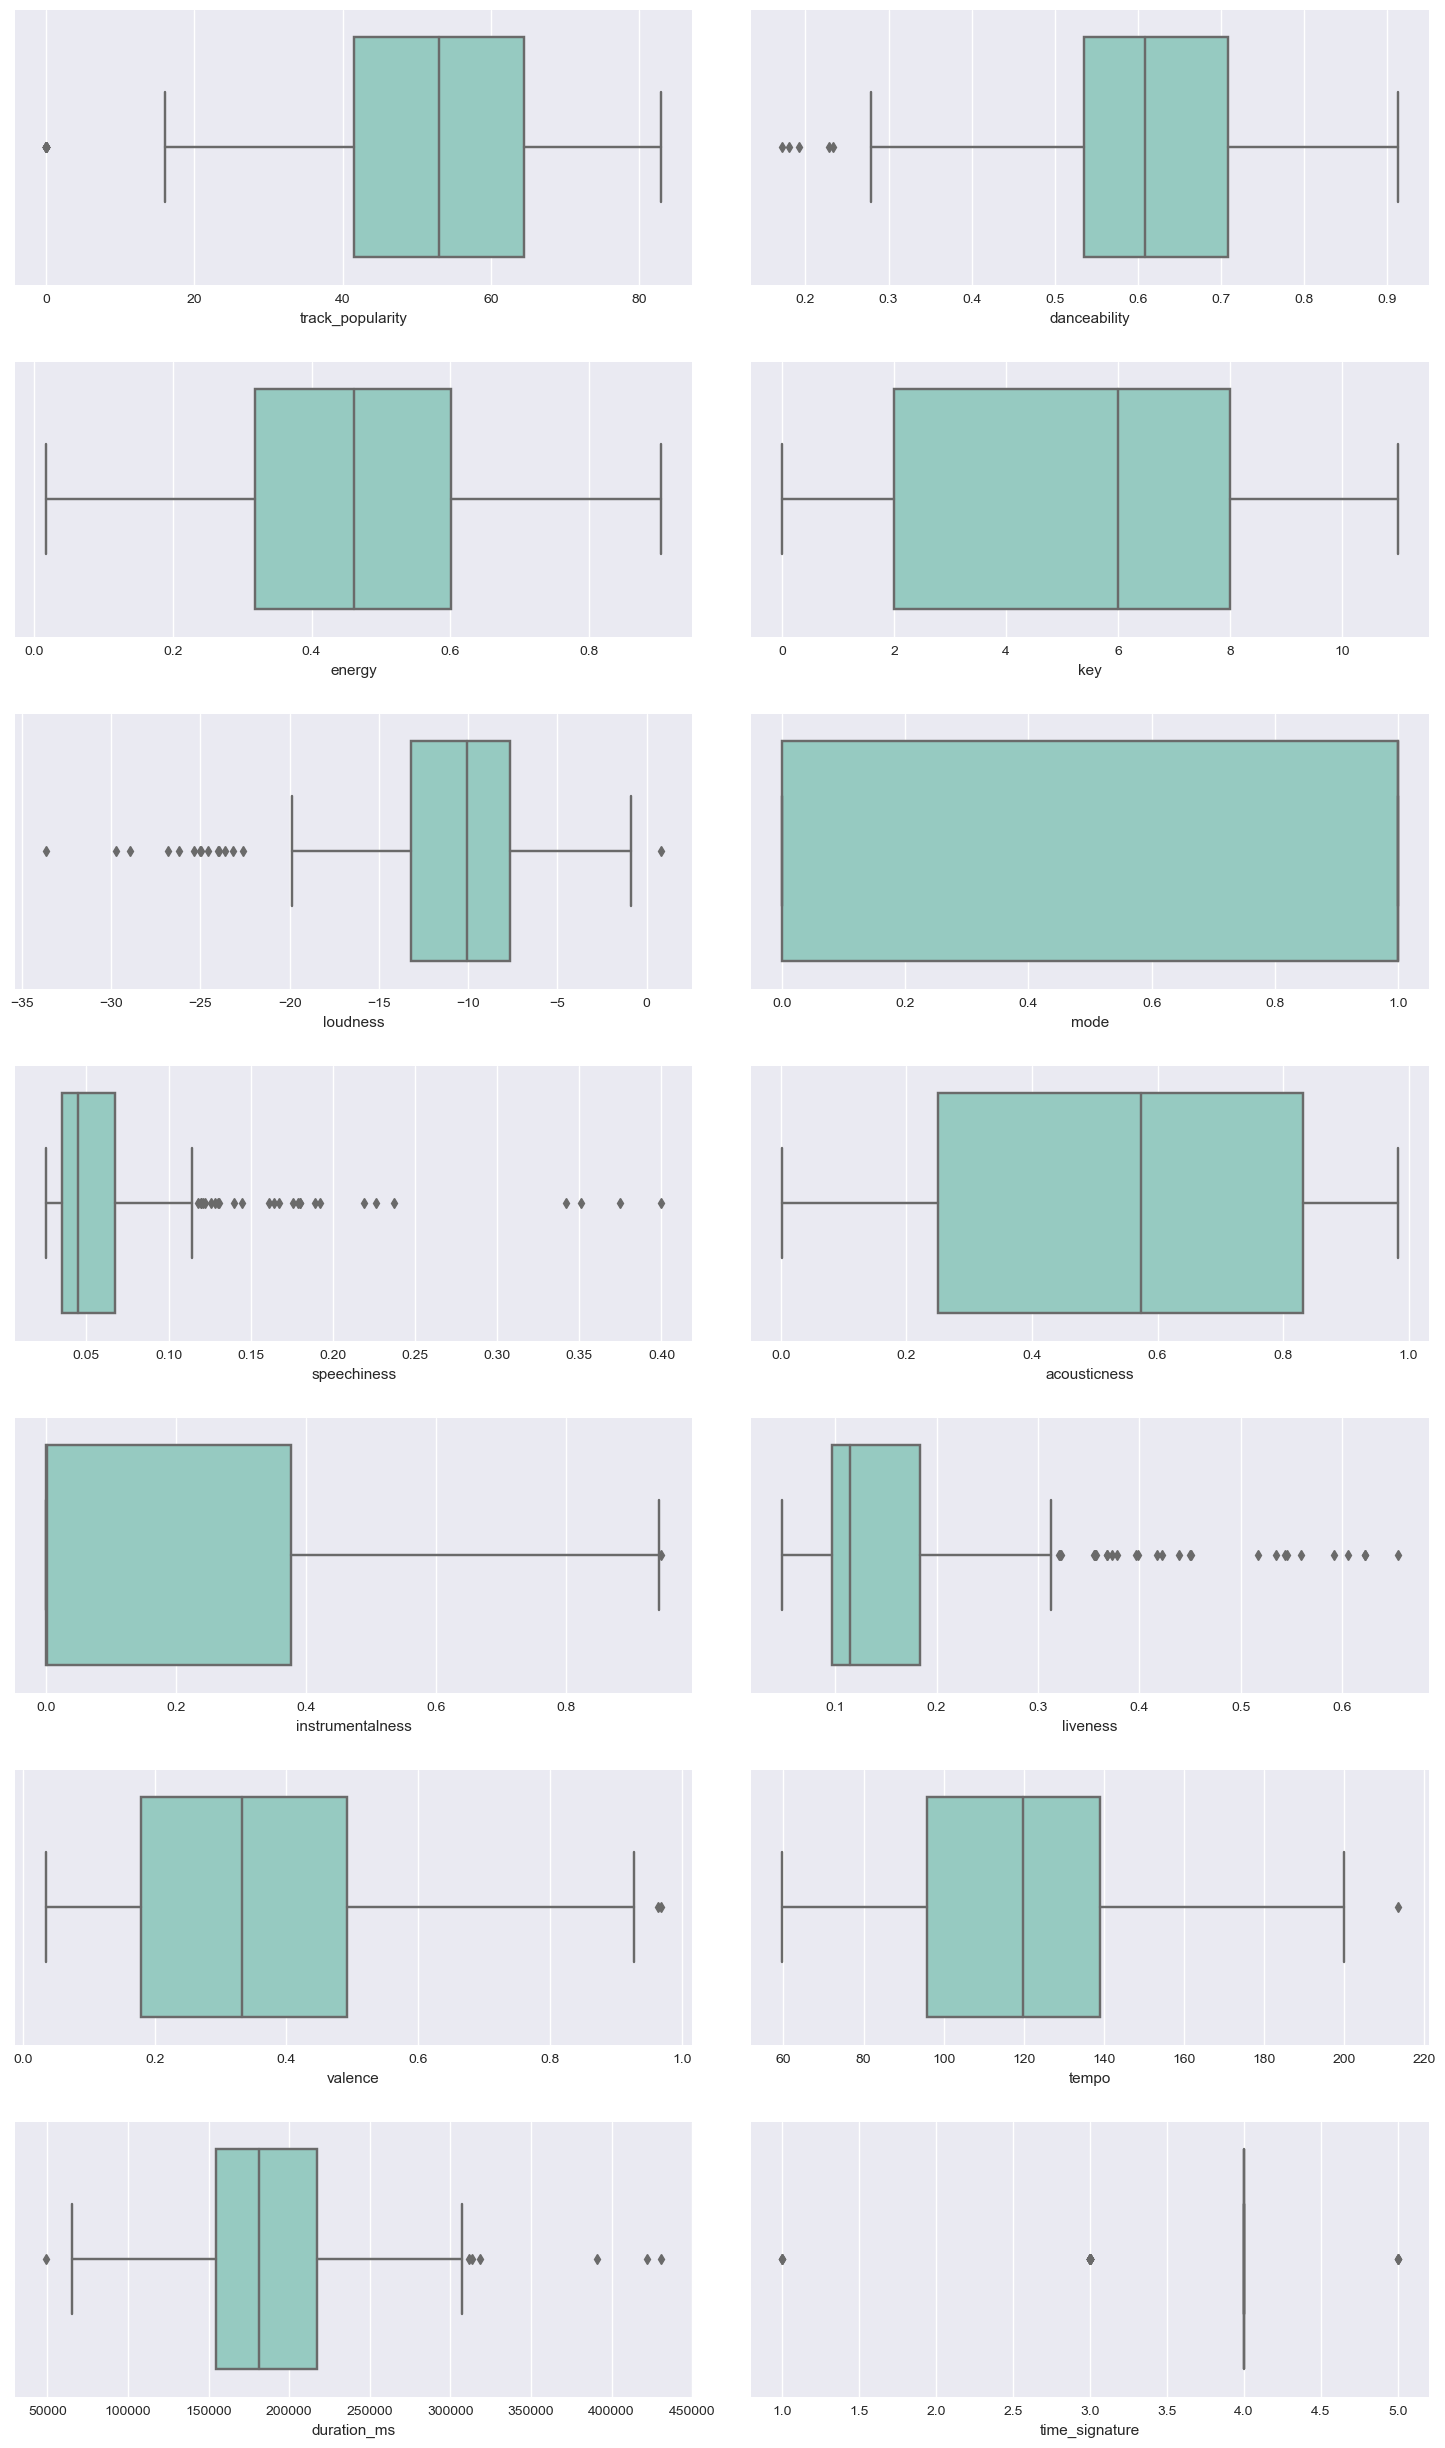

In [99]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()


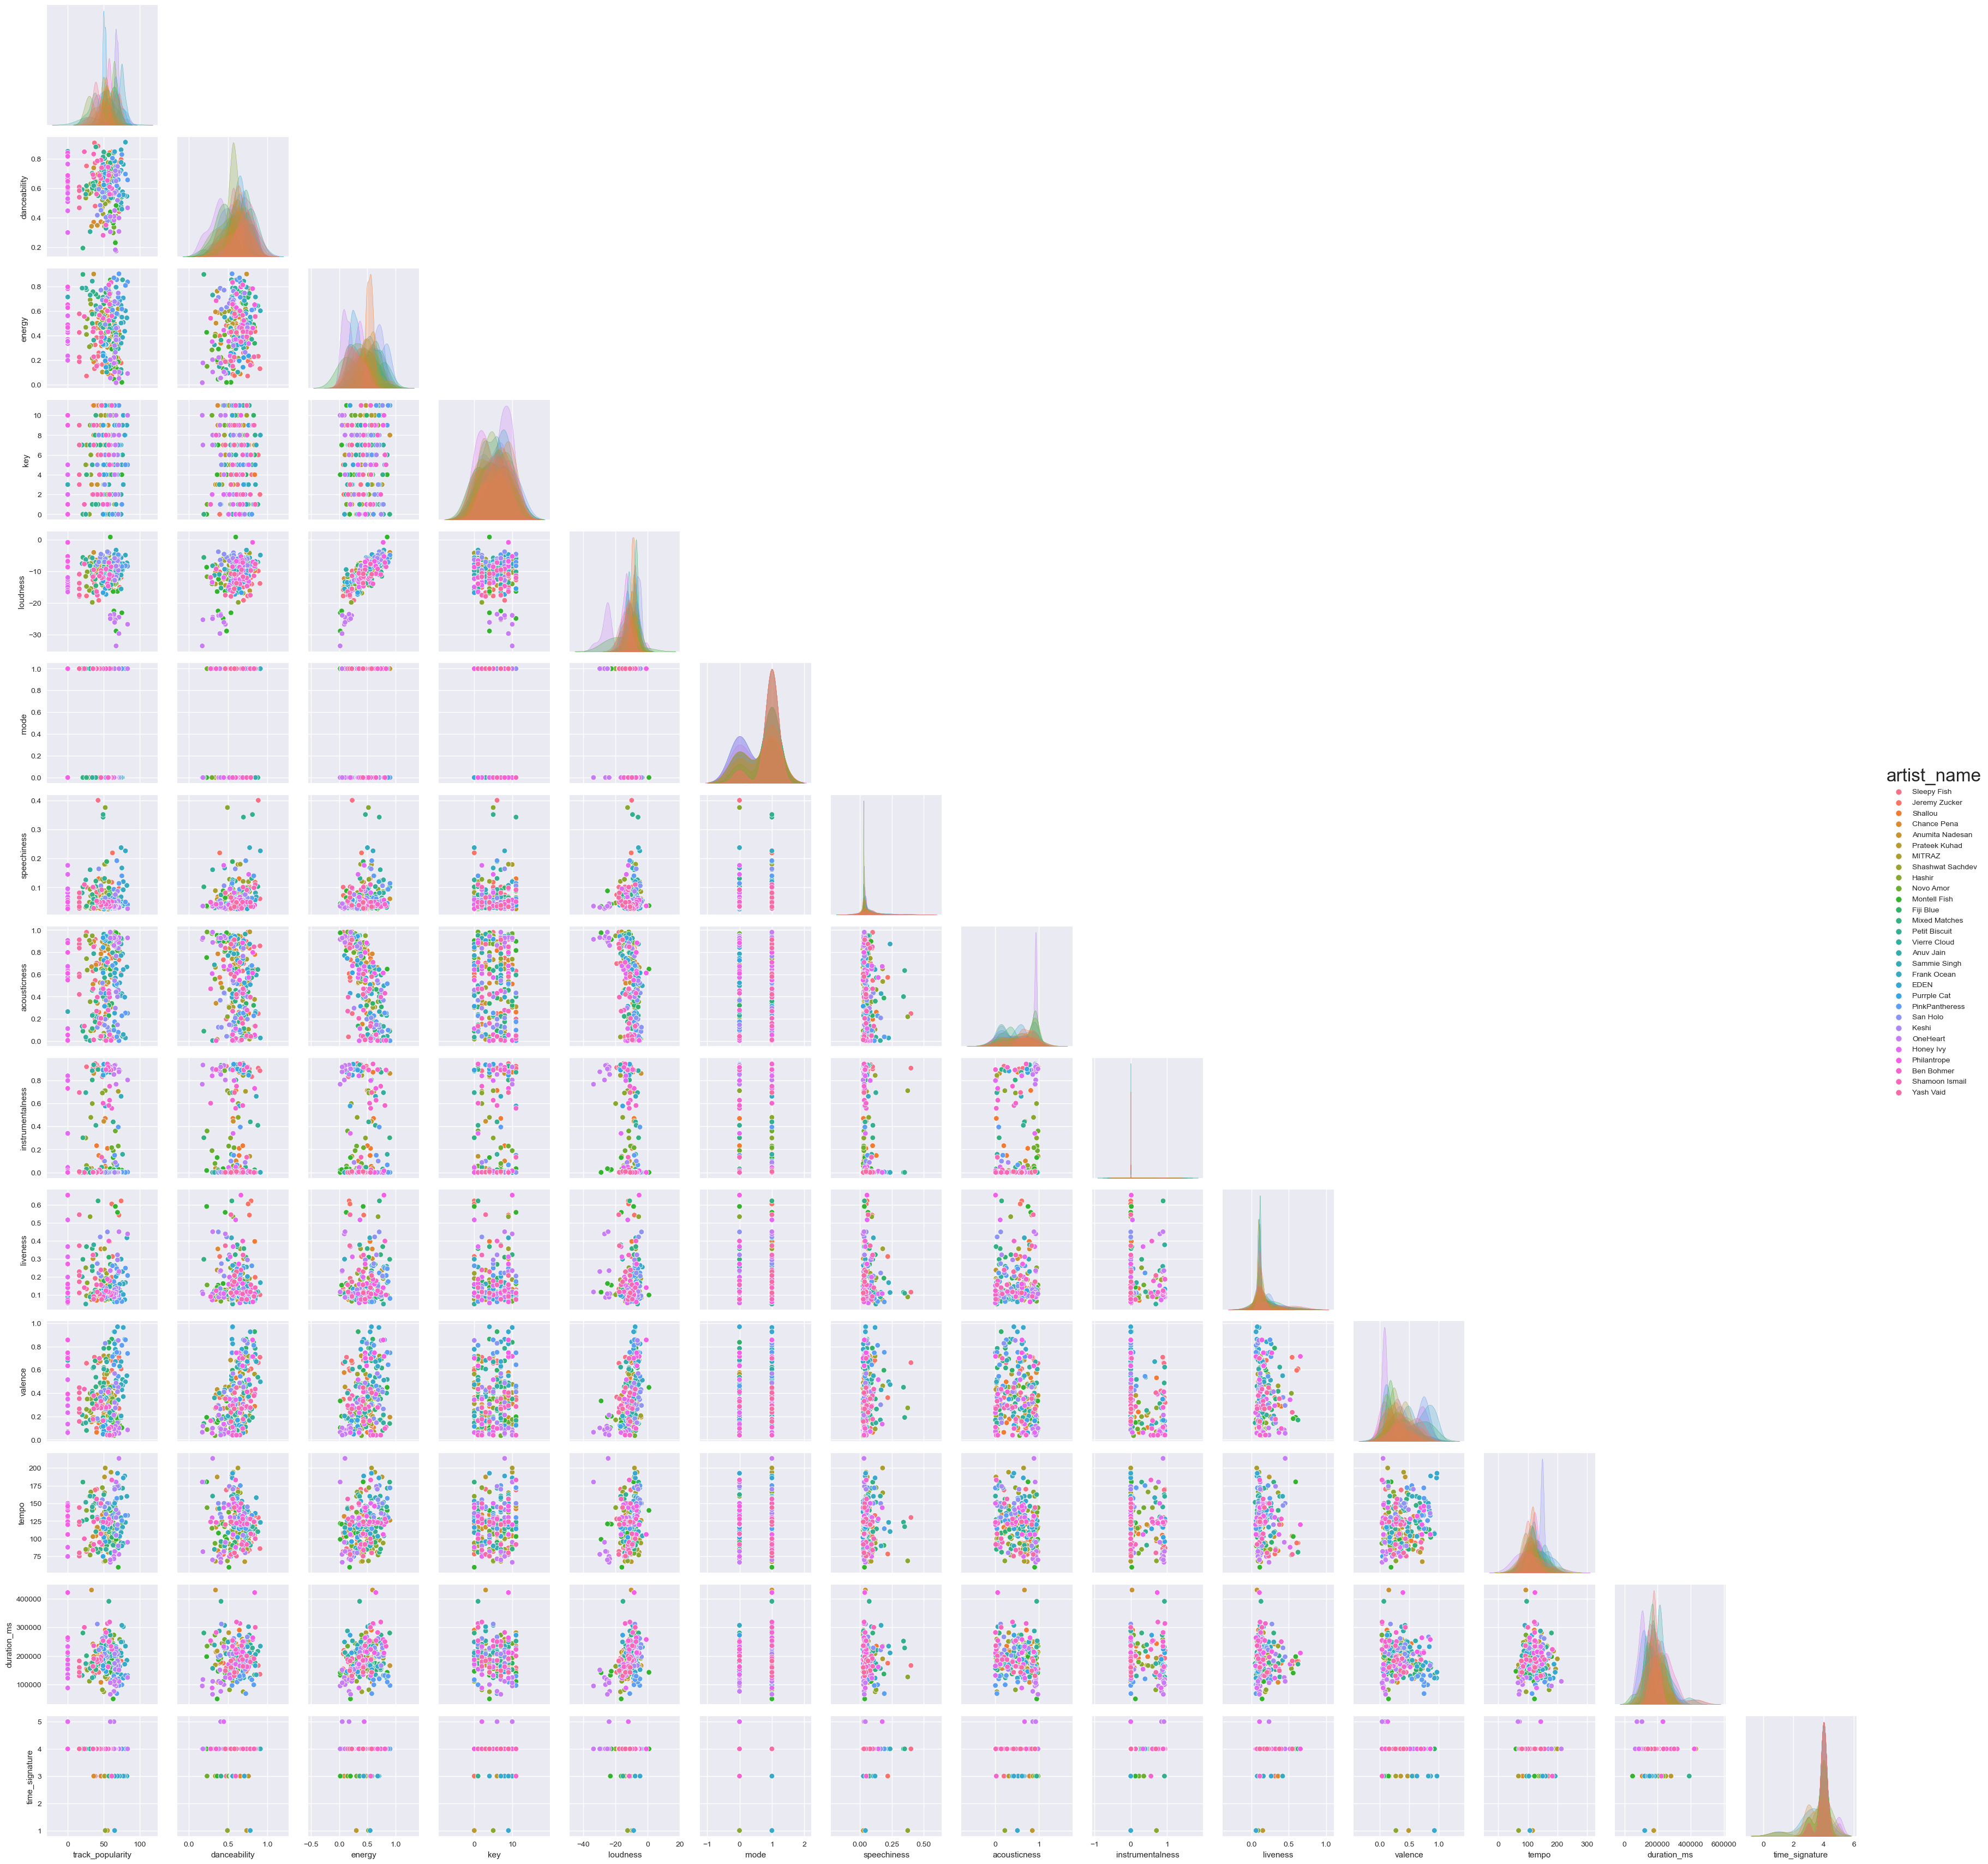

In [100]:
sns.pairplot(df,corner=True,hue='artist_name')

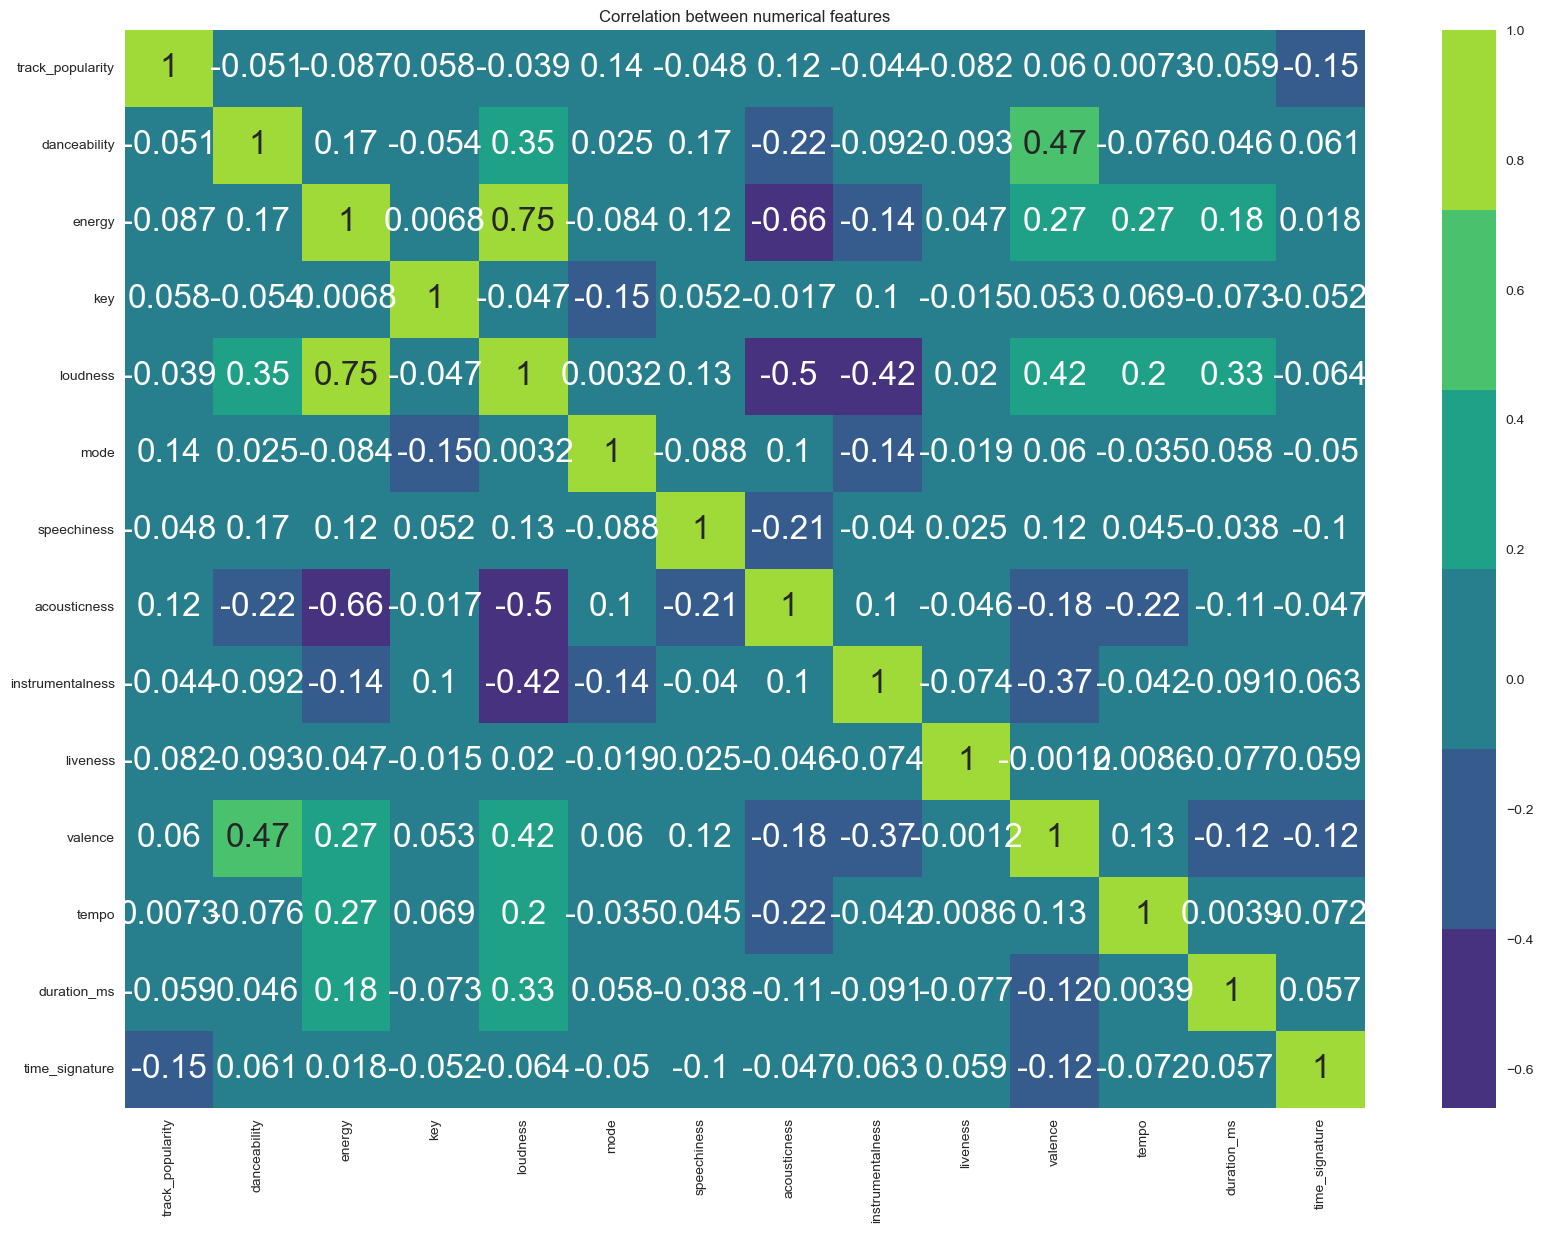

In [101]:
plt.figure(figsize = (20, 14))

corr_matrix = df.corr()
cmap = sns.color_palette('viridis')
sns.heatmap(corr_matrix, annot = True, cmap = cmap)
plt.title('Correlation between numerical features')
plt.show()

In [102]:
corr_matrix["track_popularity"].sort_values(ascending=False)

track_popularity    1.000000
mode                0.137433
acousticness        0.118012
valence             0.059629
key                 0.057696
tempo               0.007261
loudness           -0.039056
instrumentalness   -0.044284
speechiness        -0.047704
danceability       -0.050747
duration_ms        -0.058852
liveness           -0.082135
energy             -0.087364
time_signature     -0.153596
Name: track_popularity, dtype: float64

As we can see here, liveness, energy and danceblity may negatively affect the track's popularity, which can be a reason for yash vaid songs not gaining popularity

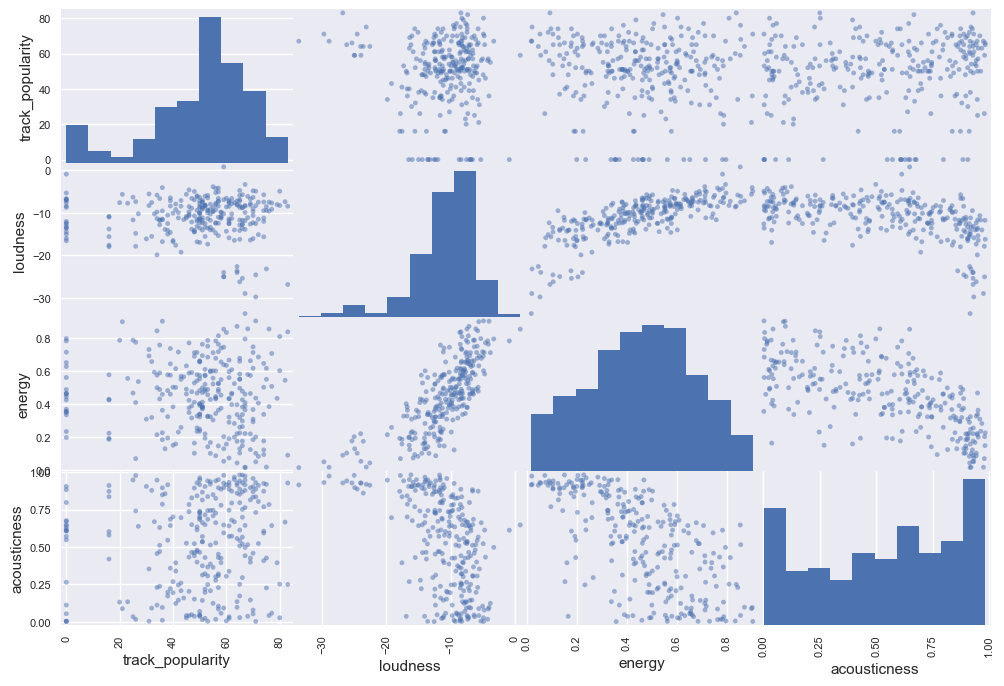

In [103]:
from pandas.plotting import scatter_matrix

attributes = ["track_popularity", "loudness", "energy","acousticness"]

scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()

In [104]:
import plotly.express as px

The output below shows us they keys of tracks y the popularity , we can figure out that tracks in D (6),E (8) and F sharp(10), while most of the tracks are in key F.

In [105]:
px.box(data_frame=df,y='track_popularity',color='key')


## Feature Selection using track_popularity as the respondent variable 

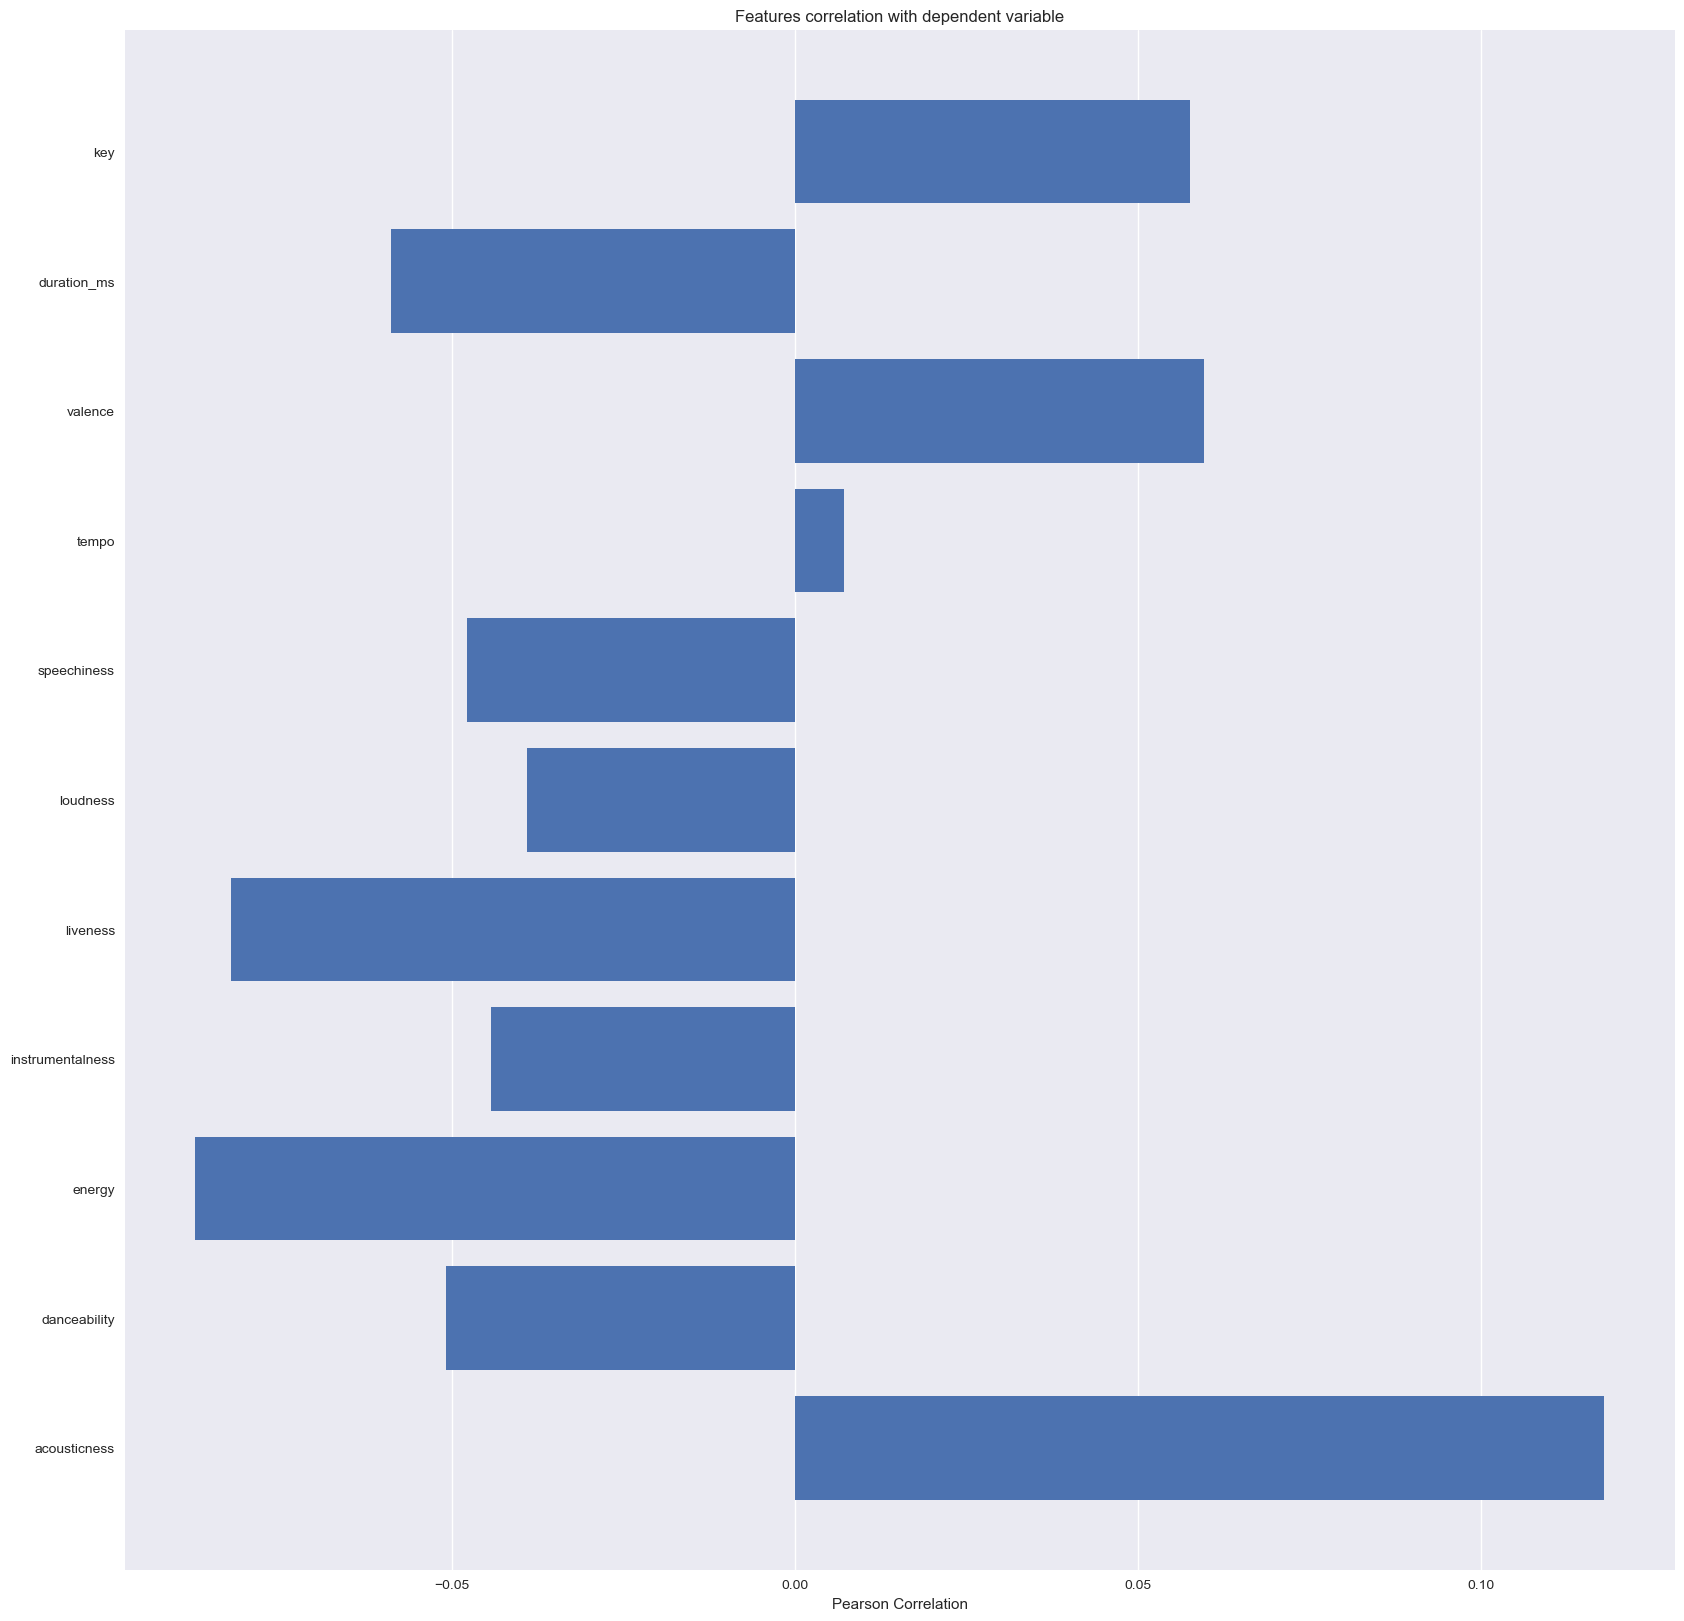

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [106]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key']

X, y = data[feature_names], data['track_popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()   



After finding the correlation of the features against the track popularity, we try to predcit the popularity based on available data 

In [107]:
total = data.shape[0]
popularity_score_more_than_40 = data[data['track_popularity'] > 40].shape[0]

probability = (popularity_score_more_than_40/total)*100
print("Probability of song getting more than 40 in popularity :", probability)

Probability of song getting more than 40 in popularity : 76.01476014760148


We can test Probablity for different Popularity scores	

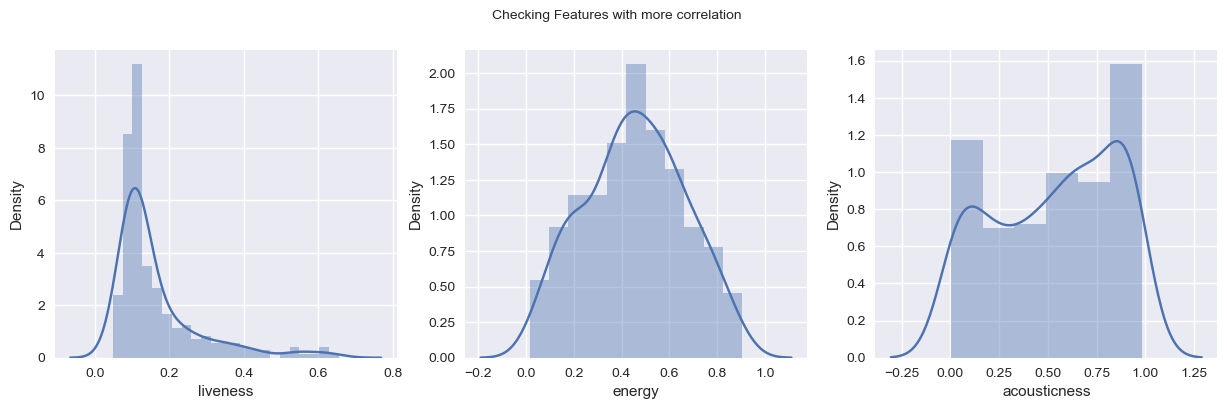

In [108]:
features_o = ['liveness','energy','acousticness']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['liveness'])

plt.subplot(1, 3, 2)
sns.distplot(data['energy'])

plt.subplot(1, 3, 3)
sns.distplot(data['acousticness'])

plt.suptitle('Checking Features with more correlation', fontsize = 10)
plt.show()

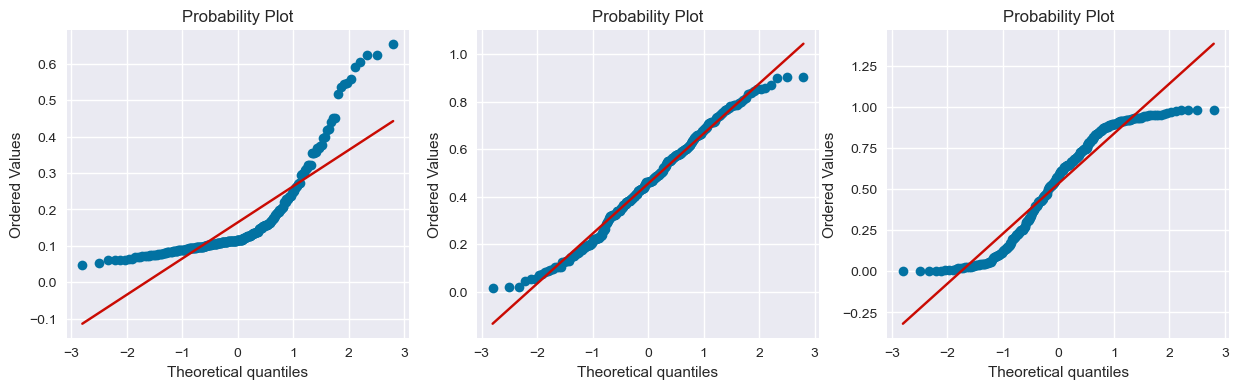

In [109]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
res = stats.probplot(data['liveness'], plot=plt)

plt.subplot(1, 3, 2)
res = stats.probplot(data['energy'], plot=plt)

plt.subplot(1, 3, 3)
res = stats.probplot(data['acousticness'], plot=plt)

In [110]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(data['track_popularity'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:

[[-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]

 [-2.57054777]]



outer range (high) of the distribution:

[[1.32920193]

 [1.32920193]

 [1.38051442]

 [1.38051442]

 [1.48313942]

 [1.53445191]

 [1.53445191]

 [1.6370769 ]

 [1.6883894 ]

 [1.6883894 ]]


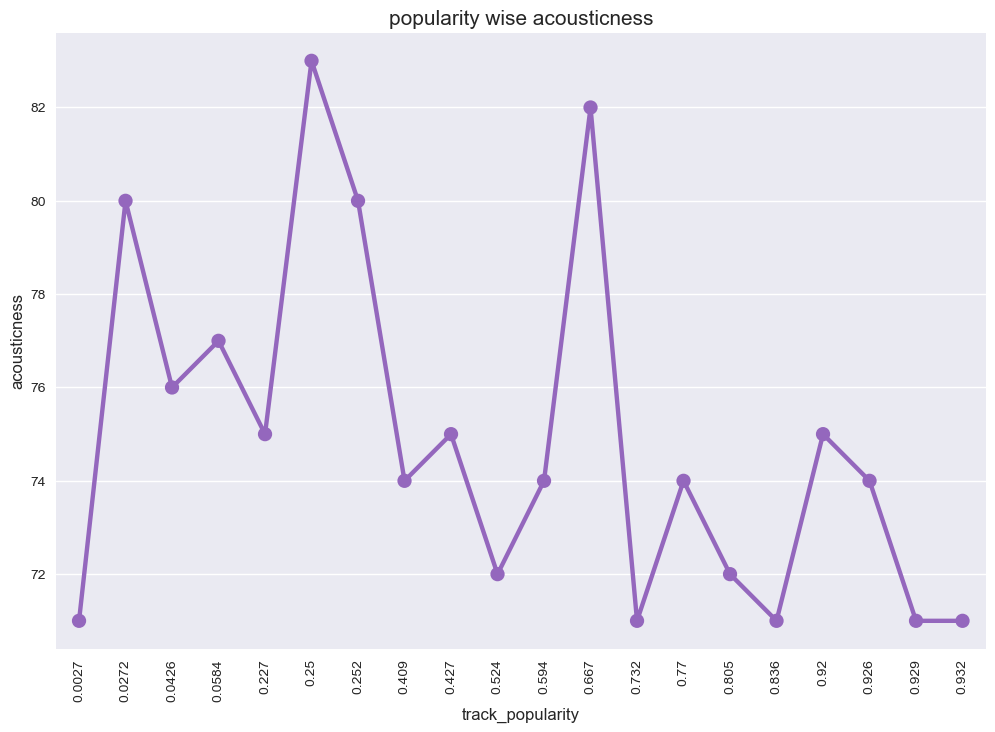

In [111]:
#Bivariate analysis

x = data.groupby("acousticness")["track_popularity"].mean().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x["acousticness"].values, x['track_popularity'].values, color=color[4])
plt.ylabel('acousticness', fontsize=12)
plt.xlabel('track_popularity', fontsize=12)
plt.title("popularity wise acousticness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

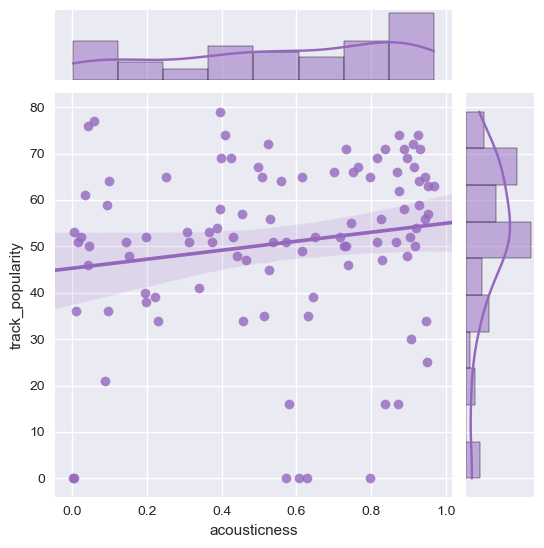

In [112]:
fig1 = sns.jointplot(x="acousticness", y="track_popularity", data=data.sample(100),
                  kind="reg", truncate=False,
                  color=color[4])

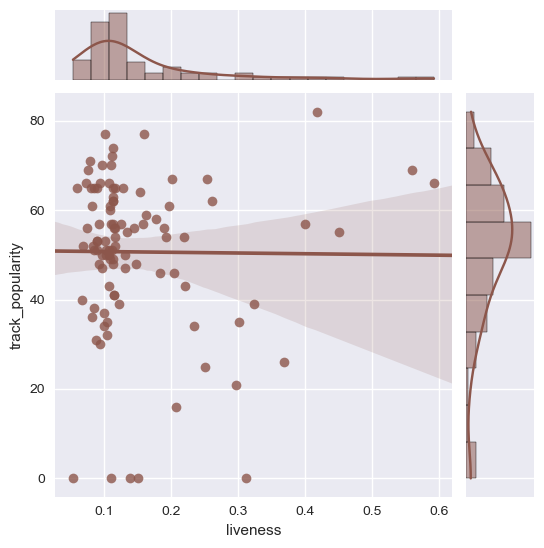

In [113]:
fig2 = sns.jointplot(x="liveness", y="track_popularity", data=data.sample(100),
                  kind="reg", truncate=False,
                  color=color[5])

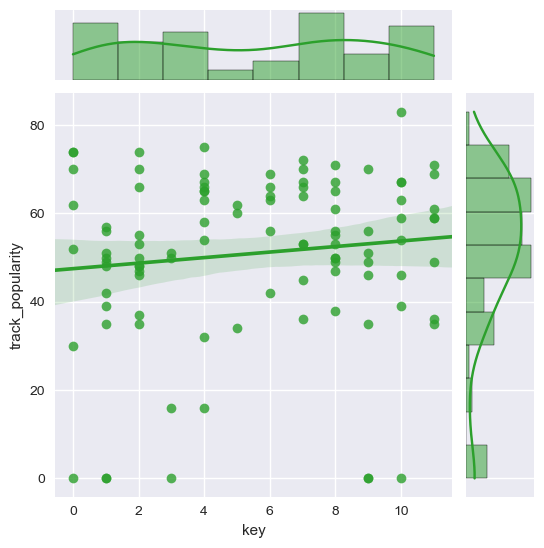

In [114]:
fig3 = sns.jointplot(x="key", y="track_popularity", data=data.sample(100),
                  kind="reg", truncate=False,
                  color=color[2])

In [115]:
from scipy.spatial import distance

In [116]:
def make_matrix_correlation(data,song,number):
    data.drop_duplicates(inplace=True)
    songs=data['name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs,)
    print('The song closest to your search is :',best)
    genre=data[data['name']==best]['key'].values[0]
    df=data[data['key']==genre]
    x=df[df['name']==best].drop(columns=['key','name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['name'].values
    df.drop(columns=['key','name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    

In [117]:
# This is a function to find the closest song name from the list
def find_word(word, words):
    words = np.array(words)
    t = []
    count = 0
    if word[-1] == ' ':
        word = word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([float(len(word) / len(i)), count])
        else:
            t.append([0, count])
        count += 1
    t.sort(reverse=True)
    return words[t[0][1]]


In [119]:
def make_matrix_correlation(data,song,number):
    data.drop_duplicates(inplace=True)
    songs=data['name'].values
    best=find_word(song,songs,)
    print('The song closest to your search is :',best)
    genre=data[data['name']==best]['key'].values[0]
    df=data[data['key']==genre]
    x=df[df['name']==best].drop(columns=['key','name']).values[0]
    song_names=df['name'].values
    df.drop(columns=['key','name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])


# Search Recommendation


In [120]:
e=input('Please enter The name of the song :')
f=int(input('Please enter the number of recommendations you want: '))
make_matrix_correlation(data,e,f)

Please enter The name of the song :tune

Please enter the number of recommendations you want: 2

The song closest to your search is : Tune Kaha


TypeError: can only concatenate str (not "int") to str

In [121]:
data['key'].value_counts()

7     32
9     29
8     27
2     27
0     26
4     23
1     23
5     21
6     20
11    16
10    14
3     13
Name: key, dtype: int64

In [ ]:
Now lets compare audio characteristics

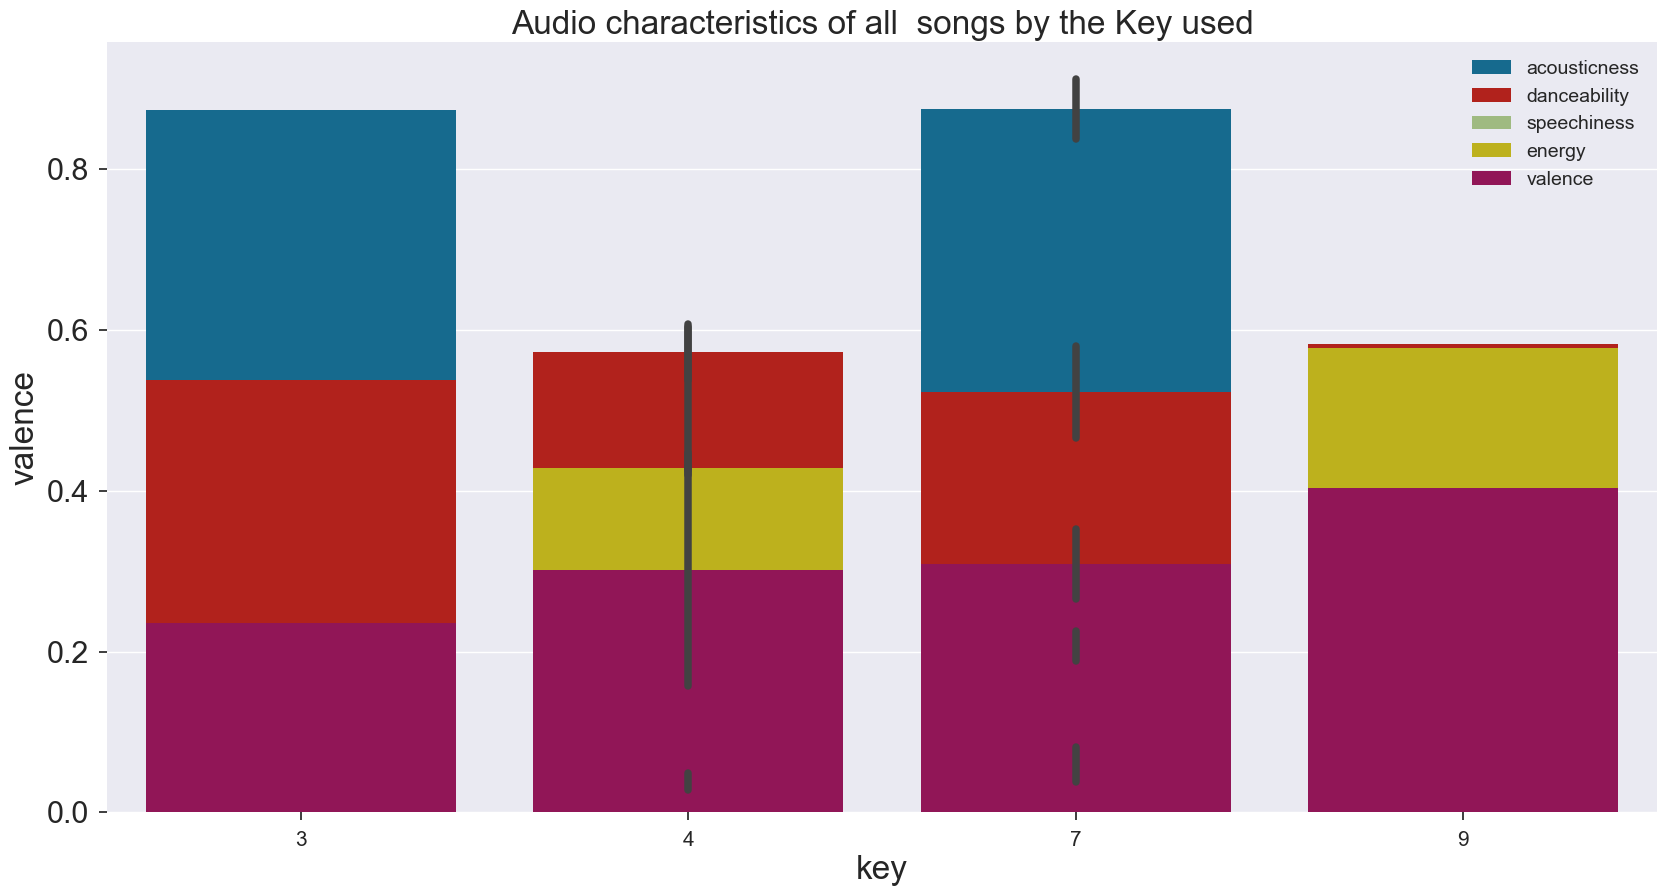

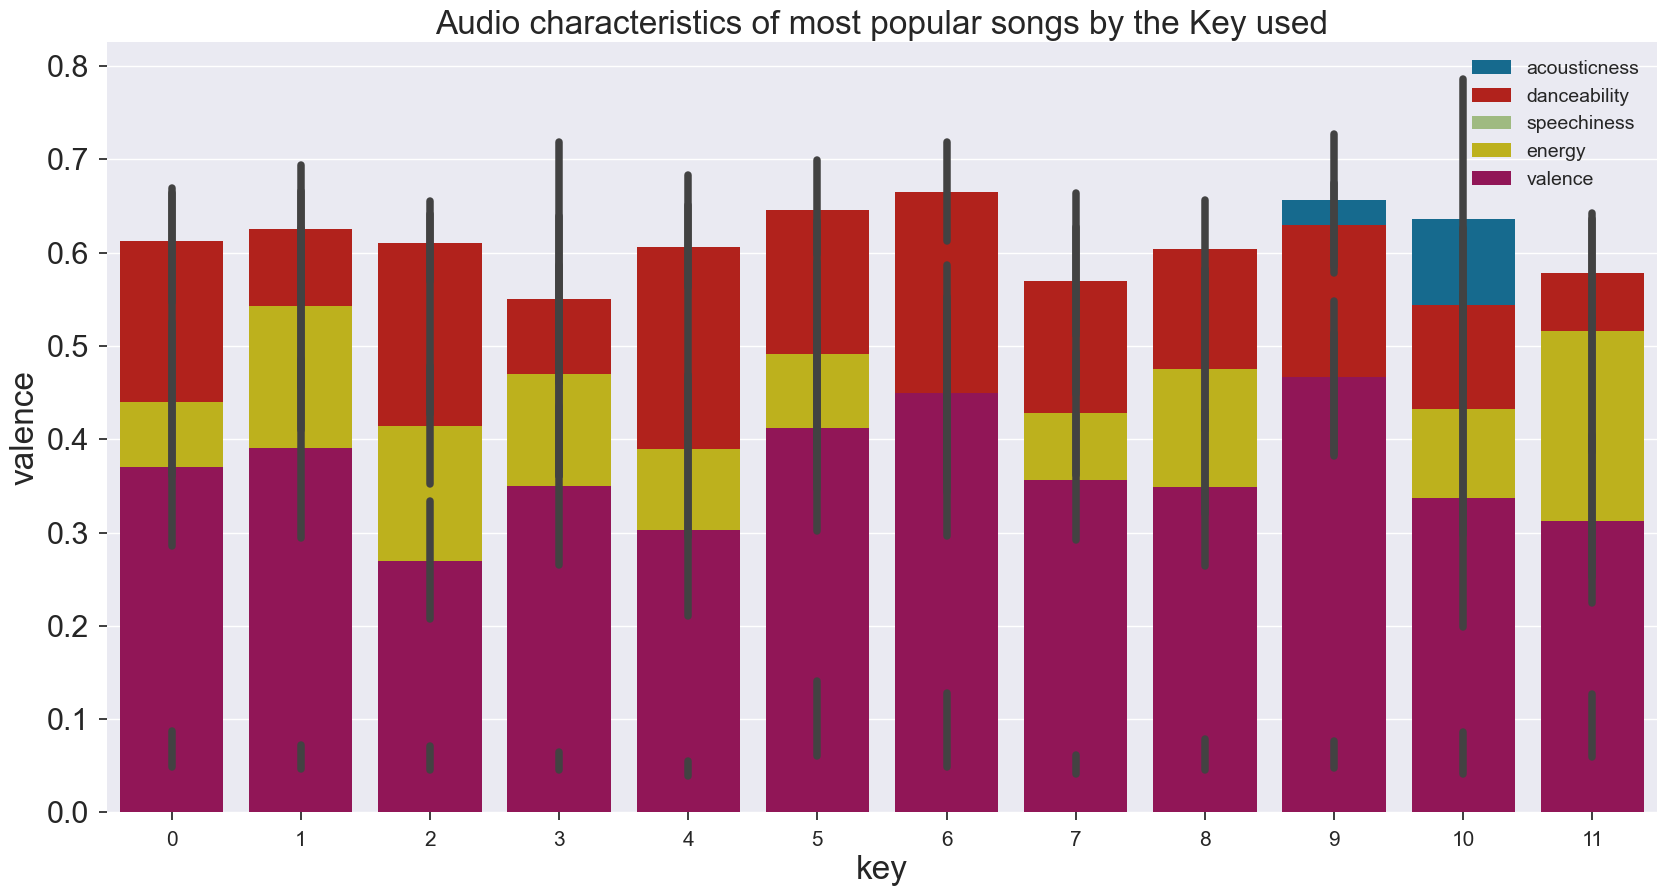

In [123]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=yash_comparison, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=yash_comparison, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=yash_comparison, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=yash_comparison, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=yash_comparison, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of all  songs by the Key used')
ax.legend(fontsize=14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=most_popularity, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=most_popularity, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=most_popularity, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=most_popularity, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=most_popularity, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of most popular songs by the Key used')
ax.legend(fontsize=14)


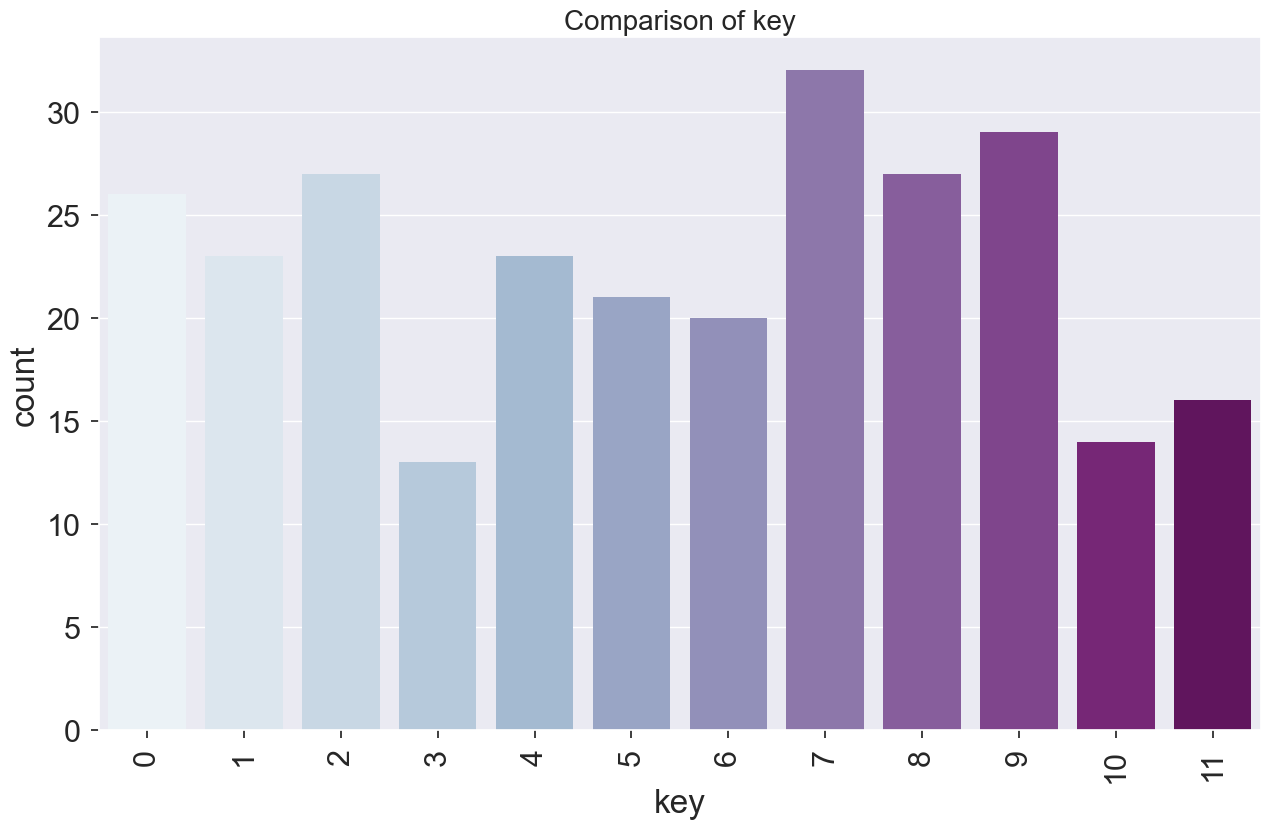

In [127]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['key'], palette = 'BuPu')
plt.title('Comparison of key', fontweight = 30, fontsize = 20)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

# Model Building


<AxesSubplot:>

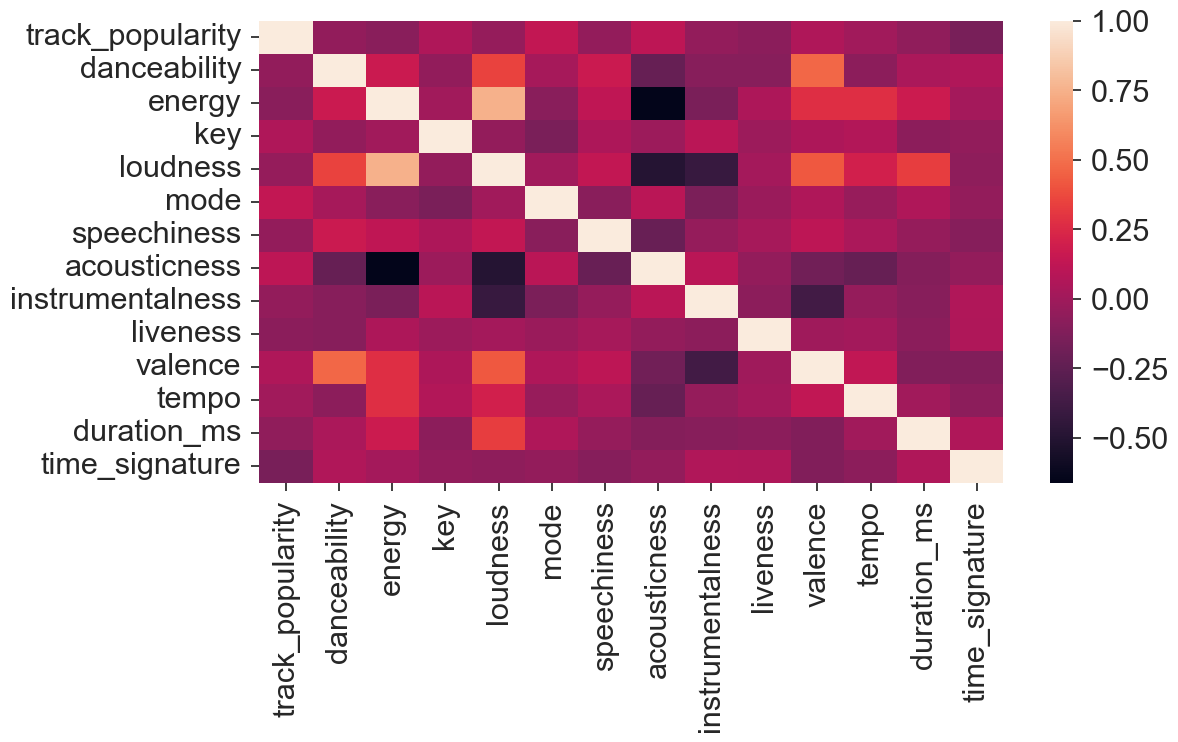

In [133]:
use_col = ['acousticness','danceability','loudness','track_popularity','duration_ms','energy','speechiness','valence']

cor = df.corr()
sns.heatmap(cor)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X = data.drop(columns=['track_popularity'])
y = data['track_popularity']


In [141]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
print("num of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

num of  train sample in train set: (216, 23)

Number of samples in validation set: (55,)


In [142]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

ValueError: could not convert string to float: 'Alone'

We Will Have to stop for, next objective will be to convert the data by one-hot encoding it.